# 문제 정의 : 와인 품질 분류 모델

* Dataset : wine.csv
* Dataset 구성 :
    * index : 구분자
    * quality : 품질
    * fixed acidity : 결합산도
        - 타르타르산(tartaric),사과산(malic)으로 이루어져 있고 와인의 산도를 제어
    * volatile acidity : 휘발성산
        - 와인향에 영향
    * citric acid : 시트르산( 구연산 )
        - 와인의 신선함을 올려주는 역할, 산성화에 연관
    * residual sugar : 잔당( 발효 후 와인 속에 남아있는 당분 )
        - 와인의 단맛 상승시키는 성분
    * chlorides : 염화물
        - 와인의 짠맛의 원인이며 와인의 신맛을 좌우하는 성분
    * free sulfur dioxide : 독립 이산화황
    * total sulfur dioxide : 총 이산화황
        - 황 화합물( 독립 이산화황, 총 이산화황 )은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는 역할 (free sulfur dioxide, total sulfur, dioxide sulphates)
    * density : 밀도
        - 바디의 높고 낮음을 표현하는 와인의 무게감을 의미
    * pH : 수소 이온 농도
        - 와인의 신맛의 정도
    * sulphates : 황산염
    * alcohol : 도수
        - 와인의 과 단맛을 주며 와인의 바디감에 영향
    * type : 종류
        - red wine, white wine

In [1]:
# IPython 매직 명령
%matplotlib inline

# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 환경 설정
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

from matplotlib import font_manager, rc

# Windows 사용시 matplotlib 한글 폰트 사용 설정
# font_path = "c:\\Windows\\Fonts\\malgun.ttf"
# font_name = font_manager.FontProperties( fname = font_path ).get_name()
# rc( 'font', family = font_name )

# Mac OS 사용시 matplotlib 한글 폰트 사용 설정
rc( 'font', family = 'AppleGothic' )

import warnings
warnings.filterwarnings( 'ignore' )

## 1. 데이터 수집

* DataFrame 생성
* DataFrame 기본 정보 확인

In [2]:
wine = pd.read_csv( '../data/wine.csv', index_col = 0 )

In [3]:
wine.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
wine.tail()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
5492,5,7.7,0.15,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7,7.8,0.15,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white
5496,6,7.0,0.35,0.17,1.1,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,white


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


In [6]:
wine.shape

(5497, 13)

In [7]:
wine.dtypes

quality                   int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
type                     object
dtype: object

## 2. 데이터 전처리

### 결측치 확인

In [8]:
wine.isnull().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

### 중복값 확인

In [9]:
wine.duplicated().sum()

858

### 이상치 확인

In [10]:
# 이상치 기준값 제공 함수
#
# 이상치는 중앙값을 크게 벗어난 값( 중앙값 기준 1.5배 넘어가는 값 )
# IQR : 1사분위수와 3사분위수의 차이값
#
# 1사분위수 - ( 1.5 )IQR
# 3사분위수 + ( 1.5 )IQR
def outlier_criteria( x, column ):
    # Q1( 1사분위수 ), Q2( 2사분위수 ) 구하기
    q1 = x[ column ].quantile( 0.25 )
    q3 = x[ column ].quantile( 0.75 )
    
    # 이상치 : 1.5 * IQR( Q3 - Q1 )
    iqr = 1.5 * ( q3 - q1 )
        
    iqr1 = q1 - iqr
    iqr3 = q3 + iqr
    
    return ( iqr1, iqr3 )

# 이상치 대체값 설정 함수
def change_outlier( data, column ):
    x = data.copy()
    
    # 이상치 기준값 계산
    iqr1, iqr3 = outlier_criteria( x, column )
    
    # 이상치 대체값 설정( 최소값, 최대값)
    standard_min = 0
    if iqr1 > 0:
        change_min = iqr1
    standard_max = iqr3
    
    # 이상치 대체
    x.loc[ ( x[ column ] > standard_max ), column ] = standard_max
    x.loc[ ( x[ column ] < standard_min ), column ] = standard_min
    
    return x
    

def print_outlier( x, column ):
    # 이상치 기준값 계산
    iqr1, iqr3 = outlier_criteria( x, column )
    
    print( f'이상치 기준값 : {round( iqr1, 3 )}, {round( iqr3, 3 )}\n' )
    outlier = list ( x[ ( x[ column ] > iqr3 ) | ( x[ column ] < iqr1 ) ][ column ] )
    
    print( f'{column} 변수 이상치\n' )
    print( outlier )
    print( f'\n{column} 변수 이상치 개수 : {len( outlier )}개' )

#### quality : 품질

In [11]:
wine[ 'quality' ].describe()

count    5497.000000
mean        5.818992
std         0.870311
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [12]:
wine[ 'quality' ].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

<AxesSubplot:>

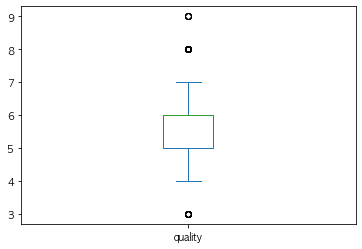

In [13]:
wine[ 'quality' ].plot( kind = 'box' )

In [14]:
print_outlier( wine, 'quality' )

이상치 기준값 : 3.5, 7.5

quality 변수 이상치

[8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 3, 3, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 3, 3, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 9, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 3, 3, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 3, 3, 8, 8, 8, 8, 9, 3, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 3, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 3, 3, 8, 8, 3, 8, 8]

quality 변수 이상치 개수 : 183개


* quality 변수 이상치는 실제 품질 등급에 해당함으로 별다른 처리없이 분석에 사용한다.

#### fixed acidity : 결합산도

In [15]:
wine[ 'fixed acidity' ].describe()

count    5497.000000
mean        7.210115
std         1.287579
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [16]:
wine[ 'fixed acidity' ].unique()

array([ 5.6 ,  8.8 ,  7.9 ,  7.  ,  7.8 ,  6.  ,  6.1 ,  7.1 ,  6.8 ,
        8.  ,  6.2 ,  7.3 , 12.5 ,  6.5 ,  8.2 ,  7.6 ,  7.2 ,  7.7 ,
        8.9 ,  6.6 ,  6.3 ,  6.4 ,  5.9 ,  9.9 ,  8.7 ,  7.5 ,  7.4 ,
        6.9 , 10.2 , 10.7 ,  8.4 ,  8.3 , 10.  ,  5.2 ,  8.6 ,  5.7 ,
        5.  ,  9.3 , 11.9 ,  8.5 ,  5.5 ,  4.9 ,  5.8 ,  6.7 ,  9.1 ,
       10.4 ,  9.5 ,  5.4 , 15.5 , 12.6 ,  5.3 ,  4.7 ,  8.1 , 11.3 ,
       11.6 ,  9.2 , 10.6 , 10.9 ,  4.6 ,  9.7 ,  9.  ,  9.8 , 11.1 ,
       11.8 , 11.5 ,  9.6 ,  5.1 , 14.3 , 10.1 , 10.8 , 10.3 , 11.  ,
        6.45, 12.8 , 12.1 , 12.9 , 13.3 ,  9.4 ,  4.4 , 12.7 , 13.7 ,
       10.5 ,  4.8 , 12.3 , 12.  , 15.6 , 12.2 , 13.5 , 11.2 , 12.4 ,
       14.  ,  6.15, 15.  , 13.4 , 13.8 , 11.7 , 13.  , 15.9 , 13.2 ,
       11.4 , 14.2 ,  3.9 ,  3.8 ,  7.15,  4.2 ,  4.5 ])

<AxesSubplot:>

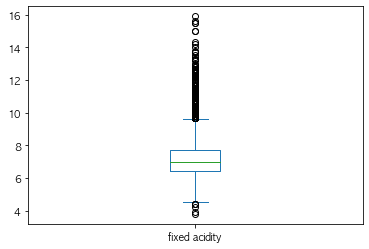

In [17]:
wine[ 'fixed acidity' ].plot( kind = 'box' )

In [18]:
print_outlier( wine, 'fixed acidity' )

이상치 기준값 : 4.45, 9.65

fixed acidity 변수 이상치

[12.5, 9.9, 10.2, 10.7, 10.0, 11.9, 10.4, 9.9, 15.5, 12.6, 9.9, 11.3, 11.6, 10.6, 10.9, 12.5, 10.0, 9.7, 10.4, 11.9, 10.6, 9.8, 11.1, 10.2, 11.8, 11.5, 11.5, 9.9, 11.5, 9.9, 10.0, 14.3, 10.1, 10.8, 11.1, 10.4, 12.6, 10.2, 10.3, 10.0, 10.3, 9.8, 11.0, 10.9, 9.8, 12.8, 12.1, 12.9, 13.3, 9.9, 10.8, 9.7, 11.6, 10.4, 4.4, 10.4, 9.9, 11.6, 10.4, 9.8, 12.7, 11.1, 13.7, 11.5, 10.0, 10.5, 10.4, 10.5, 9.9, 12.3, 12.0, 10.0, 9.7, 10.4, 9.8, 10.7, 9.8, 11.1, 15.6, 10.7, 10.5, 10.4, 11.1, 11.9, 12.0, 10.3, 12.2, 13.5, 11.6, 10.4, 4.4, 11.9, 9.8, 10.4, 9.8, 12.0, 11.2, 10.5, 9.8, 9.9, 10.3, 12.4, 10.0, 9.7, 10.2, 10.2, 10.0, 9.9, 10.1, 11.8, 9.7, 10.3, 10.6, 12.2, 9.7, 10.2, 11.1, 9.7, 12.8, 10.0, 10.2, 12.4, 11.5, 11.9, 10.7, 14.0, 9.8, 11.9, 13.3, 10.6, 15.0, 10.9, 9.9, 4.4, 10.9, 10.3, 10.8, 12.9, 13.4, 10.7, 9.8, 9.8, 10.7, 13.7, 15.0, 9.9, 13.8, 11.7, 11.0, 10.0, 10.5, 10.5, 10.4, 10.1, 13.0, 15.9, 13.2, 10.6, 13.2, 12.7, 10.2, 10.9, 10.0, 11.4, 10.4,

* fixed acidity 변수 이상치는 결합산도에 해당함으로 별다른 처리없이 분석에 사용한다.

#### volatile acidity : 휘발성산

In [19]:
wine[ 'volatile acidity' ].describe()

count    5497.000000
mean        0.338163
std         0.163224
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile acidity, dtype: float64

In [20]:
wine[ 'volatile acidity' ].unique()

array([0.695, 0.61 , 0.21 , 0.4  , 0.19 , 0.22 , 0.38 , 0.24 , 0.39 ,
       0.18 , 0.16 , 0.33 , 0.31 , 0.49 , 0.37 , 0.28 , 0.23 , 0.56 ,
       0.715, 0.75 , 0.29 , 0.36 , 0.41 , 0.26 , 0.44 , 0.59 , 0.27 ,
       0.735, 0.32 , 0.74 , 0.6  , 0.305, 0.46 , 0.54 , 0.53 , 0.295,
       0.43 , 0.34 , 0.69 , 0.1  , 0.405, 0.2  , 0.3  , 0.58 , 0.17 ,
       0.25 , 0.785, 0.12 , 0.335, 0.15 , 0.35 , 0.775, 0.64 , 0.5  ,
       0.385, 0.68 , 0.145, 0.48 , 0.55 , 0.67 , 0.62 , 0.365, 0.63 ,
       0.645, 0.78 , 0.84 , 0.875, 0.13 , 0.125, 0.45 , 0.275, 0.14 ,
       0.745, 0.52 , 0.255, 0.76 , 0.83 , 0.345, 0.57 , 0.51 , 0.175,
       0.47 , 0.165, 0.11 , 0.7  , 0.265, 0.915, 0.42 , 0.545, 1.04 ,
       0.685, 1.13 , 0.89 , 0.66 , 0.565, 0.835, 0.245, 0.82 , 0.475,
       0.65 , 0.91 , 1.33 , 0.555, 0.765, 0.72 , 0.795, 0.92 , 0.08 ,
       0.895, 0.585, 0.395, 0.77 , 0.8  , 0.615, 0.415, 0.105, 0.815,
       0.73 , 0.205, 0.88 , 0.655, 0.98 , 0.965, 1.18 , 0.185, 1.115,
       0.725, 0.9  ,

<AxesSubplot:>

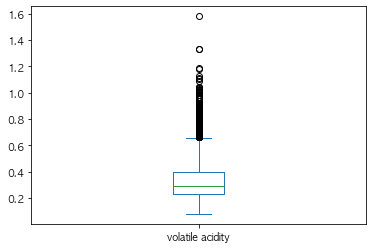

In [21]:
wine[ 'volatile acidity' ].plot( kind = 'box' )

In [22]:
print_outlier( wine, 'volatile acidity' )

이상치 기준값 : -0.025, 0.655

volatile acidity 변수 이상치

[0.695, 0.715, 0.75, 0.75, 0.735, 0.74, 0.69, 0.695, 0.69, 0.785, 0.775, 0.68, 0.67, 0.78, 0.735, 0.75, 0.785, 0.84, 0.875, 0.67, 0.745, 0.69, 0.76, 0.695, 0.715, 0.83, 0.775, 0.67, 0.69, 0.76, 0.7, 0.915, 0.68, 0.69, 1.04, 0.685, 0.74, 1.13, 0.89, 0.66, 0.835, 0.82, 0.91, 0.66, 1.33, 0.84, 0.765, 0.745, 0.685, 0.72, 0.795, 0.69, 0.67, 0.685, 0.92, 0.895, 0.765, 0.785, 0.67, 0.77, 0.78, 0.68, 0.8, 0.685, 0.82, 0.72, 0.76, 0.67, 0.76, 0.66, 0.685, 0.74, 0.66, 0.815, 0.73, 0.66, 0.785, 0.88, 0.73, 0.98, 0.68, 0.715, 0.68, 0.67, 0.965, 0.78, 1.18, 0.66, 0.685, 1.115, 0.695, 0.725, 0.685, 0.66, 0.69, 0.9, 0.915, 0.7, 0.78, 1.005, 0.66, 0.74, 0.68, 0.715, 0.775, 0.705, 0.66, 0.885, 0.66, 0.78, 0.66, 0.74, 0.66, 0.7, 0.74, 0.67, 0.875, 0.805, 0.88, 1.02, 0.7, 0.69, 0.66, 0.885, 1.005, 0.75, 0.81, 0.67, 0.705, 0.66, 0.69, 0.75, 0.8, 0.71, 0.695, 0.69, 0.715, 0.7, 0.84, 0.82, 0.735, 0.695, 0.67, 0.73, 0.67, 0.685, 0.85, 0.67, 0.935, 1.01, 0.715

* volatile acidity 변수 이상치는 휘발성산에 해당함으로 별다른 처리없이 분석에 사용한다.

#### citric acid : 시트르산

In [23]:
wine[ 'citric acid' ].describe()

count    5497.000000
mean        0.318543
std         0.145104
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

In [24]:
wine[ 'citric acid' ].unique()

array([0.06, 0.14, 0.39, 0.31, 0.26, 0.37, 0.49, 0.42, 0.35, 0.33, 0.4 ,
       0.17, 0.6 , 0.48, 0.25, 0.01, 0.34, 0.58, 0.  , 0.36, 0.2 , 0.3 ,
       0.32, 0.99, 0.27, 0.02, 0.22, 0.74, 0.28, 0.52, 0.38, 0.29, 0.11,
       0.43, 0.45, 0.41, 0.44, 0.24, 0.15, 0.03, 0.07, 0.69, 0.19, 0.57,
       0.04, 0.55, 0.5 , 0.66, 0.65, 0.47, 0.16, 0.12, 0.46, 0.08, 0.1 ,
       0.18, 0.51, 0.21, 0.05, 0.62, 0.23, 0.72, 0.68, 0.56, 0.53, 1.  ,
       1.66, 0.71, 0.09, 0.59, 0.73, 0.64, 0.54, 0.7 , 0.13, 0.82, 0.81,
       0.63, 0.76, 0.79, 0.8 , 0.91, 0.86, 0.61, 0.75, 0.67, 0.78, 1.23,
       0.88])

<AxesSubplot:>

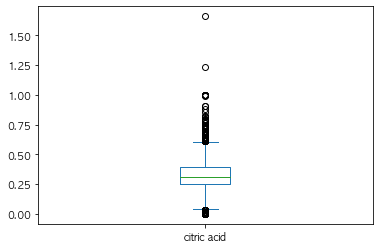

In [25]:
wine[ 'citric acid' ].plot( kind = 'box' )

In [26]:
print_outlier( wine, 'citric acid' )

이상치 기준값 : 0.04, 0.6

citric acid 변수 이상치

[0.01, 0.0, 0.99, 0.02, 0.74, 0.0, 0.01, 0.0, 0.03, 0.69, 0.0, 0.0, 0.01, 0.66, 0.65, 0.66, 0.01, 0.0, 0.66, 0.66, 0.62, 0.72, 0.0, 0.65, 0.74, 0.68, 0.01, 1.0, 1.66, 0.0, 0.01, 0.71, 0.68, 0.62, 0.0, 0.74, 0.02, 0.0, 0.0, 0.0, 0.0, 0.65, 0.73, 0.03, 0.64, 0.74, 0.74, 0.0, 0.02, 0.7, 0.0, 1.0, 0.01, 0.02, 0.64, 0.64, 0.0, 0.0, 0.02, 0.66, 0.68, 0.0, 0.0, 0.0, 0.74, 0.74, 0.74, 0.0, 0.0, 0.0, 0.0, 0.74, 0.0, 0.66, 0.74, 0.0, 0.0, 0.0, 0.73, 0.0, 0.62, 0.64, 0.82, 0.0, 0.0, 0.0, 0.68, 0.02, 0.03, 0.03, 0.0, 0.03, 0.0, 0.65, 0.64, 0.7, 0.0, 0.66, 0.02, 0.65, 0.0, 0.64, 0.0, 0.02, 0.01, 0.0, 0.02, 0.02, 0.0, 0.0, 0.0, 0.65, 0.02, 0.62, 0.01, 1.0, 0.02, 0.68, 0.81, 0.0, 0.0, 0.0, 0.63, 0.0, 0.68, 0.76, 0.0, 0.0, 0.74, 0.74, 0.0, 0.65, 0.63, 0.0, 0.65, 0.0, 0.0, 0.02, 0.62, 0.02, 0.02, 1.0, 0.62, 0.02, 0.0, 0.0, 0.79, 0.03, 0.74, 0.02, 0.8, 0.66, 0.0, 0.66, 0.0, 0.02, 0.0, 0.91, 0.02, 0.03, 0.03, 0.69, 0.71, 0.01, 0.0, 0.65, 0.03, 0.0, 0.0, 0.0, 0.02,

* citric acid 변수 이상치는 시트르산에 해당함으로 별다른 처리없이 분석에 사용한다.

#### residual sugar : 잔당

In [27]:
wine[ 'residual sugar' ].describe()

count    5497.000000
mean        5.438075
std         4.756676
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

In [28]:
wine[ 'residual sugar' ].unique()

array([ 6.8 ,  2.4 ,  2.  ,  6.  ,  9.5 ,  9.7 ,  1.5 , 11.8 , 18.3 ,
       11.6 ,  0.9 ,  1.1 ,  6.85,  1.  ,  2.6 ,  7.  ,  2.1 ,  4.8 ,
        7.5 , 10.5 ,  1.7 ,  1.2 ,  2.5 ,  3.9 ,  2.2 , 15.  ,  1.6 ,
       16.  ,  2.3 , 13.  , 10.6 ,  3.8 ,  7.9 , 11.9 , 14.4 ,  7.1 ,
        1.4 , 12.8 ,  4.2 , 15.4 , 11.1 , 13.6 ,  1.8 ,  6.1 , 14.6 ,
        5.3 ,  2.9 , 12.9 ,  3.6 ,  2.7 , 16.8 ,  1.9 , 14.9 , 11.  ,
        7.05,  7.8 , 17.85,  1.45,  1.3 ,  4.1 ,  9.1 ,  2.8 ,  4.5 ,
        3.3 ,  8.2 , 12.7 , 14.2 ,  4.7 , 14.3 , 10.4 , 19.35,  5.4 ,
        6.3 ,  5.  ,  9.25,  4.75, 16.9 , 12.6 ,  5.9 ,  8.9 , 13.65,
        3.7 ,  4.9 , 10.2 ,  9.9 , 18.1 ,  6.2 ,  7.45,  0.8 ,  8.25,
        5.45,  4.6 , 18.75, 18.  , 17.2 ,  6.4 ,  8.6 ,  9.3 , 15.5 ,
        8.3 , 13.8 , 12.4 , 18.6 ,  7.7 ,  3.4 ,  5.5 ,  5.7 ,  6.6 ,
        8.5 , 17.3 ,  3.65,  1.25, 10.7 , 19.8 ,  3.1 ,  7.4 , 16.65,
        8.  , 18.95, 14.  ,  4.  ,  8.8 ,  9.4 ,  5.6 ,  4.55, 11.2 ,
       10.1 ,  7.2 ,

<AxesSubplot:>

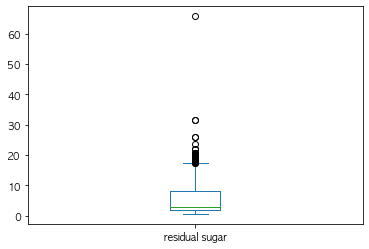

In [29]:
wine[ 'residual sugar' ].plot( kind = 'box' )

In [30]:
print_outlier( wine, 'residual sugar' )

이상치 기준값 : -7.65, 17.55

residual sugar 변수 이상치

[18.3, 17.85, 19.35, 18.1, 18.75, 18.0, 18.6, 19.8, 18.95, 17.8, 19.8, 17.9, 20.2, 17.8, 17.8, 19.3, 18.75, 19.25, 18.15, 19.9, 18.1, 17.8, 18.05, 18.8, 19.1, 19.8, 65.8, 19.5, 18.15, 19.8, 18.95, 17.75, 19.95, 18.15, 18.35, 18.5, 17.85, 17.8, 18.05, 18.95, 18.35, 18.3, 18.1, 17.8, 19.95, 20.7, 20.2, 18.2, 26.05, 18.15, 18.1, 18.1, 17.8, 19.3, 19.45, 17.75, 18.15, 26.05, 17.85, 19.45, 17.85, 19.3, 17.6, 17.55, 17.8, 20.3, 20.8, 20.8, 19.4, 18.05, 17.8, 23.5, 17.8, 20.15, 18.0, 18.1, 22.0, 31.6, 19.25, 17.55, 31.6, 17.7, 18.4, 17.95, 19.25, 19.3, 18.15, 18.2, 17.85, 18.75, 17.75, 19.6, 17.95, 20.7, 17.75, 20.4, 18.75, 17.8, 19.5, 18.9, 18.8, 19.4, 22.0, 18.35, 17.8, 18.15]

residual sugar 변수 이상치 개수 : 106개


* residual sugar 변수 이상치는 잔당에 해당함으로 별다른 처리없이 분석에 사용한다.

#### chlorides : 염화물

In [31]:
wine[ 'chlorides' ].describe()

count    5497.000000
mean        0.055808
std         0.034653
min         0.009000
25%         0.038000
50%         0.047000
75%         0.064000
max         0.610000
Name: chlorides, dtype: float64

In [32]:
wine[ 'chlorides' ].unique()

array([0.042, 0.067, 0.057, 0.046, 0.059, 0.032, 0.051, 0.041, 0.044,
       0.049, 0.038, 0.081, 0.043, 0.097, 0.029, 0.073, 0.083, 0.039,
       0.064, 0.086, 0.027, 0.045, 0.063, 0.065, 0.095, 0.047, 0.122,
       0.11 , 0.05 , 0.078, 0.054, 0.055, 0.113, 0.053, 0.079, 0.214,
       0.125, 0.036, 0.117, 0.048, 0.026, 0.093, 0.037, 0.031, 0.06 ,
       0.114, 0.019, 0.035, 0.033, 0.03 , 0.034, 0.08 , 0.028, 0.091,
       0.104, 0.07 , 0.056, 0.052, 0.074, 0.022, 0.105, 0.062, 0.024,
       0.085, 0.103, 0.387, 0.02 , 0.29 , 0.014, 0.088, 0.077, 0.255,
       0.205, 0.058, 0.04 , 0.082, 0.121, 0.023, 0.066, 0.1  , 0.071,
       0.118, 0.061, 0.075, 0.169, 0.09 , 0.094, 0.087, 0.068, 0.025,
       0.414, 0.144, 0.092, 0.128, 0.154, 0.089, 0.133, 0.076, 0.102,
       0.152, 0.208, 0.069, 0.119, 0.021, 0.226, 0.271, 0.124, 0.072,
       0.098, 0.209, 0.172, 0.132, 0.185, 0.157, 0.61 , 0.17 , 0.107,
       0.25 , 0.111, 0.084, 0.136, 0.115, 0.127, 0.173, 0.243, 0.201,
       0.149, 0.123,

<AxesSubplot:>

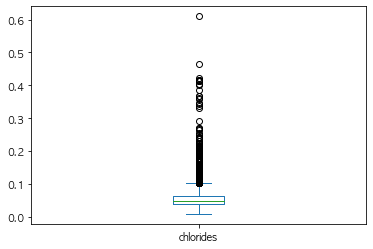

In [33]:
wine[ 'chlorides' ].plot( kind = 'box' )

In [34]:
print_outlier( wine, 'chlorides' )

이상치 기준값 : -0.001, 0.103

chlorides 변수 이상치

[0.122, 0.11, 0.122, 0.113, 0.214, 0.125, 0.1169999999999999, 0.114, 0.104, 0.105, 0.387, 0.29, 0.255, 0.205, 0.121, 0.118, 0.1689999999999999, 0.414, 0.144, 0.128, 0.154, 0.133, 0.152, 0.208, 0.119, 0.104, 0.226, 0.271, 0.124, 0.105, 0.209, 0.172, 0.132, 0.185, 0.114, 0.157, 0.61, 0.17, 0.107, 0.25, 0.157, 0.414, 0.111, 0.119, 0.132, 0.111, 0.136, 0.124, 0.107, 0.115, 0.127, 0.173, 0.243, 0.201, 0.149, 0.123, 0.401, 0.104, 0.1119999999999999, 0.105, 0.107, 0.114, 0.146, 0.114, 0.111, 0.106, 0.222, 0.1369999999999999, 0.415, 0.1969999999999999, 0.174, 0.358, 0.1119999999999999, 0.157, 0.236, 0.212, 0.161, 0.175, 0.166, 0.12, 0.11, 0.226, 0.1159999999999999, 0.126, 0.147, 0.1119999999999999, 0.104, 0.2, 0.11, 0.176, 0.109, 0.186, 0.119, 0.16, 0.122, 0.205, 0.104, 0.11, 0.171, 0.152, 0.147, 0.156, 0.174, 0.107, 0.123, 0.1169999999999999, 0.114, 0.158, 0.4029999999999999, 0.27, 0.107, 0.184, 0.119, 0.132, 0.111, 0.369, 0.337, 0.106, 0.109, 0.118,

* chlorides 변수 이상치는 염화물에 해당함으로 별다른 처리없이 분석에 사용한다.

#### free sulfur dioxide : 독립 이산화황

In [35]:
wine[ 'free sulfur dioxide' ].describe()

count    5497.000000
mean       30.417682
std        17.673881
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

In [36]:
wine[ 'free sulfur dioxide' ].unique()

array([  9. ,  10. ,  21. ,  29. ,  32. ,  17. ,  18. ,  40. ,  57. ,
        36. ,  31. ,  39. ,  54. ,  12. ,  30. ,  13. ,  34. ,  20. ,
        42. ,   6. ,  61. ,   5. ,  69. ,  38. ,  45. ,  68. , 110. ,
        41. ,   7. ,  48.5,  33. ,  55. ,  15. ,  66. ,  37. ,  62. ,
        28. ,  58. ,   3. ,  50. ,  51. ,  22. ,  52. ,  43.5,   4. ,
        27. ,  16. ,  53. ,  24. ,  14. ,  19. ,  26. ,  23. ,  67. ,
        60. ,  73. ,  49. ,  75. ,  59. ,   8. ,  48. ,  44. ,  56. ,
        35. ,  25. , 108. ,  11. ,  70. ,  96. ,  63. ,  47. ,  46. ,
        65. ,  43. ,  74. , 105. ,  87. ,  86. ,   2. , 138.5,  83. ,
        78. ,  85. ,  81. ,  64. ,  60.5, 146.5,  28.5, 131. , 124. ,
         1. ,   5.5,  73.5,  98. ,  76. ,  40.5,  77. ,  39.5,  52.5,
        61.5,  41.5,  72. ,  79.5,  38.5,  42.5, 101. ,  11.5,  71. ,
        50.5,  79. , 128. ,  59.5,  35.5,  64.5,  82. , 118.5,  44.5,
        15.5, 112. ,  77.5,  89. ,  97. ,  19.5,  30.5,  95. ,  88. ,
       289. ])

<AxesSubplot:>

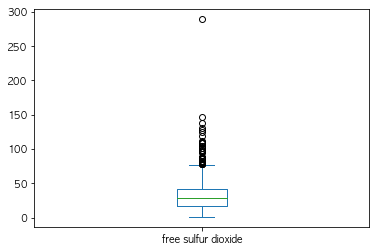

In [37]:
wine[ 'free sulfur dioxide' ].plot( kind = 'box' )

In [38]:
print_outlier( wine, 'free sulfur dioxide' )

이상치 기준값 : -19.0, 77.0

free sulfur dioxide 변수 이상치

[110.0, 108.0, 96.0, 105.0, 87.0, 86.0, 138.5, 83.0, 78.0, 85.0, 81.0, 146.5, 131.0, 124.0, 98.0, 87.0, 105.0, 98.0, 79.5, 81.0, 101.0, 79.0, 128.0, 78.0, 83.0, 96.0, 108.0, 79.5, 87.0, 81.0, 82.0, 83.0, 118.5, 112.0, 77.5, 101.0, 78.0, 81.0, 108.0, 87.0, 89.0, 79.5, 79.0, 97.0, 95.0, 88.0, 289.0]

free sulfur dioxide 변수 이상치 개수 : 47개


* free sulfur dioxide 변수 이상치는 독립 이산화황에 해당함으로 별다른 처리없이 분석에 사용한다.

#### total sulfur dioxide : 총 이산화황

In [39]:
wine[ 'total sulfur dioxide' ].describe()

count    5497.000000
mean      115.566491
std        56.288223
min         6.000000
25%        78.000000
50%       118.000000
75%       155.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

In [40]:
wine[ 'total sulfur dioxide' ].unique()

array([ 84. ,  42. , 138. , 108. , 178. ,  50. ,  87. , 193. , 142. ,
       220. , 109. ,  82. , 144. ,  72. , 149. , 145. , 128. ,  76. ,
       165. , 157. , 100. ,  97. ,  43. ,  30. ,  96. ,  77. , 115. ,
       106. , 186. ,  22. , 160. , 209. , 129. , 116. ,  89. , 124. ,
       198. , 168. , 224. ,  13. ,  37. ,  95. , 212. , 114. ,  49. ,
       132. , 231. , 102. , 163. , 181. ,  94. , 113. ,  70. , 134. ,
        12. , 173. , 126. , 162. ,  10. , 245. , 188. , 221. ,  65. ,
       111. , 185. ,  44. , 184. , 119. , 171. ,  98. ,  46. , 107. ,
        55. , 150. ,  21. , 161. ,  35. , 187. , 164. ,  61. ,  92. ,
       213. , 131. , 103. , 207. , 130. , 141. ,  67. , 158. , 174. ,
       101. ,  48. , 190. ,  53. , 215. , 121. , 170. ,  28. , 118. ,
        39. , 189. ,  54. , 122. , 167. ,  75. ,  64. , 151. ,  73. ,
        88. , 202. , 205. , 104. , 137. , 196. , 255. , 183. ,  33. ,
        23. ,  41. , 152. , 135. ,  19. ,  31. ,  91. , 200. ,  18. ,
        29. , 172. ,

<AxesSubplot:>

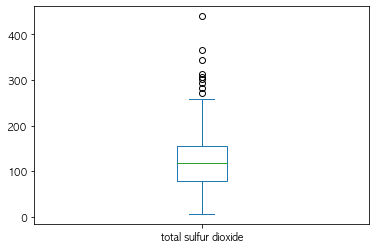

In [41]:
wine[ 'total sulfur dioxide' ].plot( kind = 'box' )

In [42]:
print_outlier( wine, 'total sulfur dioxide' )

이상치 기준값 : -37.5, 270.5

total sulfur dioxide 변수 이상치

[272.0, 307.5, 313.0, 344.0, 366.5, 303.0, 282.0, 294.0, 440.0]

total sulfur dioxide 변수 이상치 개수 : 9개


* total sulfur dioxide 변수 이상치는 총 이산화황에 해당함으로 별다른 처리없이 분석에 사용한다.

#### density : 밀도

In [43]:
wine[ 'density' ].describe()

count    5497.000000
mean        0.994673
std         0.003014
min         0.987110
25%         0.992300
50%         0.994800
75%         0.996930
max         1.038980
Name: density, dtype: float64

In [44]:
wine[ 'density' ].unique()

array([0.99432 , 0.9969  , 0.99176 , 0.9939  , 0.9955  , 0.9932  ,
       0.9928  , 0.99624 , 1.      , 0.99775 , 0.99007 , 0.991   ,
       0.992   , 0.99304 , 0.9996  , 0.9952  , 0.9975  , 0.99074 ,
       0.9966  , 0.9972  , 0.9938  , 0.99586 , 0.99112 , 0.99371 ,
       0.99824 , 0.99035 , 0.9927  , 0.9978  , 0.9914  , 0.993   ,
       0.99884 , 0.9986  , 0.99705 , 0.9981  , 0.9936  , 0.98954 ,
       0.99664 , 0.9994  , 0.99437 , 0.99666 , 0.998   , 0.99639 ,
       0.99158 , 0.9902  , 0.9968  , 1.00369 , 0.99313 , 0.9977  ,
       0.98819 , 0.99118 , 1.0003  , 0.99459 , 0.98998 , 0.99572 ,
       0.99362 , 0.9892  , 0.99378 , 0.99544 , 0.99408 , 0.9984  ,
       0.99882 , 0.9922  , 0.99    , 0.9983  , 0.99636 , 0.9935  ,
       0.99851 , 0.98962 , 0.99125 , 0.99097 , 0.9948  , 0.99084 ,
       0.99058 , 0.99592 , 0.9908  , 0.98956 , 0.99652 , 0.9913  ,
       0.99256 , 0.996   , 0.9954  , 0.99044 , 0.99535 , 0.9912  ,
       0.9991  , 0.99033 , 0.99335 , 0.99164 , 0.99002 , 1.001

<AxesSubplot:>

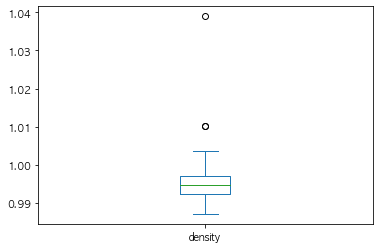

In [45]:
wine[ 'density' ].plot( kind = 'box' )

In [46]:
print_outlier( wine, 'density' )

이상치 기준값 : 0.985, 1.004

density 변수 이상치

[1.03898, 1.0103, 1.0103]

density 변수 이상치 개수 : 3개


* density 변수 이상치는 밀도에 해당함으로 별다른 처리없이 분석에 사용한다.

#### pH : 수소 이온 농도

In [47]:
wine[ 'pH' ].describe()

count    5497.000000
mean        3.219502
std         0.160713
min         2.740000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [48]:
wine[ 'pH' ].unique()

array([3.44, 3.19, 3.05, 3.26, 3.04, 3.08, 3.3 , 3.07, 2.89, 3.32, 3.03,
       3.13, 3.1 , 3.21, 3.17, 3.06, 3.36, 3.11, 3.41, 3.34, 3.24, 3.15,
       3.27, 3.37, 3.16, 3.47, 3.09, 3.29, 3.58, 3.28, 3.38, 3.25, 3.22,
       3.14, 3.18, 2.95, 3.31, 3.2 , 3.4 , 3.35, 3.61, 3.52, 3.48, 3.02,
       3.45, 2.97, 3.12, 3.01, 3.  , 3.39, 2.86, 3.6 , 3.54, 3.67, 3.23,
       3.42, 3.5 , 2.99, 3.33, 3.51, 2.94, 3.46, 2.98, 2.92, 2.9 , 3.53,
       3.85, 3.66, 3.56, 2.96, 2.88, 3.43, 3.9 , 3.49, 3.63, 3.57, 3.59,
       4.01, 3.55, 2.93, 3.65, 2.74, 3.71, 2.91, 2.83, 2.85, 3.8 , 2.87,
       3.74, 3.68, 3.72, 2.82, 3.62, 2.8 , 3.82, 3.75, 3.69, 3.81, 3.79,
       3.77, 2.84, 3.76, 2.79, 2.77, 3.78, 3.7 , 3.64])

<AxesSubplot:>

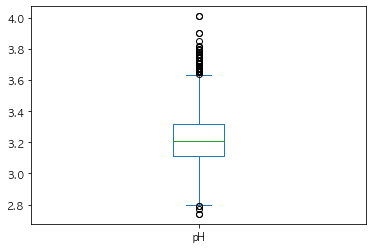

In [49]:
wine[ 'pH' ].plot( kind = 'box' )

In [50]:
print_outlier( wine, 'pH' )

이상치 기준값 : 2.795, 3.635

pH 변수 이상치

[3.67, 3.85, 3.66, 3.9, 4.01, 3.65, 2.74, 3.71, 3.8, 3.74, 3.71, 3.71, 3.68, 3.66, 3.9, 3.72, 3.66, 3.67, 3.74, 4.01, 3.82, 3.75, 3.8, 3.69, 2.74, 3.81, 3.68, 3.79, 3.65, 3.77, 3.66, 3.66, 3.68, 3.66, 3.72, 3.68, 3.76, 3.66, 3.66, 3.69, 3.67, 3.69, 3.72, 3.69, 3.75, 2.79, 3.71, 2.77, 3.75, 3.68, 3.78, 3.72, 3.7, 2.79, 3.67, 3.65, 3.76, 3.68, 3.64, 3.69]

pH 변수 이상치 개수 : 60개


* pH 변수 이상치는 수소 이온 농도에 해당함으로 별다른 처리없이 분석에 사용한다.

#### sulphates : 황산염

In [51]:
wine[ 'sulphates' ].describe()

count    5497.000000
mean        0.530524
std         0.149396
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

In [52]:
wine[ 'sulphates' ].unique()

array([0.44, 0.59, 0.52, 0.5 , 0.43, 0.66, 0.46, 0.49, 0.41, 0.53, 0.3 ,
       0.4 , 0.73, 0.33, 1.03, 0.84, 0.55, 0.75, 0.57, 0.64, 0.6 , 0.51,
       0.67, 0.45, 0.58, 0.31, 0.68, 0.56, 0.77, 0.81, 0.39, 0.42, 0.69,
       0.37, 0.62, 0.34, 0.61, 0.47, 0.54, 0.65, 0.48, 0.35, 0.63, 0.71,
       0.79, 0.82, 0.38, 0.32, 0.78, 0.74, 0.7 , 0.36, 0.92, 0.72, 0.9 ,
       0.28, 0.76, 0.98, 0.87, 0.83, 1.33, 0.99, 0.96, 0.86, 0.97, 0.91,
       0.88, 0.27, 1.18, 1.02, 2.  , 0.85, 0.29, 0.8 , 1.04, 1.01, 1.34,
       0.94, 0.89, 1.13, 1.06, 1.14, 1.36, 0.25, 0.26, 1.17, 1.08, 0.93,
       1.05, 1.07, 1.95, 0.95, 1.11, 1.12, 1.15, 1.1 , 1.61, 1.59, 1.98,
       1.28, 1.16, 1.62, 1.56, 0.22, 1.  , 1.09])

<AxesSubplot:>

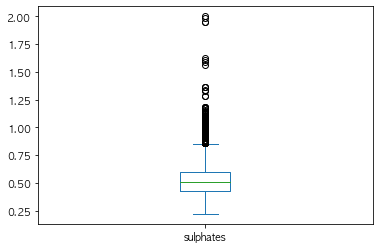

In [53]:
wine[ 'sulphates' ].plot( kind = 'box' )

In [54]:
print_outlier( wine, 'sulphates' )

이상치 기준값 : 0.175, 0.855

sulphates 변수 이상치

[1.03, 0.92, 0.9, 0.98, 0.87, 1.33, 0.99, 0.96, 0.86, 0.97, 0.91, 0.88, 1.18, 1.02, 0.86, 0.91, 0.88, 2.0, 1.04, 0.88, 1.01, 0.87, 1.34, 0.94, 0.94, 1.01, 0.87, 0.92, 0.86, 0.94, 0.89, 0.88, 0.98, 1.13, 1.06, 0.96, 0.89, 1.02, 1.14, 0.97, 0.89, 0.87, 1.06, 1.36, 1.17, 1.08, 0.93, 1.05, 1.05, 1.08, 1.13, 1.07, 0.86, 0.98, 0.97, 0.92, 0.86, 0.9, 0.91, 0.87, 1.95, 1.06, 0.87, 0.93, 1.18, 0.86, 0.95, 1.11, 0.98, 0.88, 1.12, 0.87, 1.15, 1.02, 0.86, 1.1, 1.61, 1.17, 0.93, 0.88, 0.93, 0.9, 0.86, 0.97, 0.93, 0.99, 0.9, 1.08, 0.96, 0.9, 0.88, 0.91, 0.86, 0.92, 1.1, 0.9, 1.36, 0.88, 0.9, 0.98, 1.59, 0.9, 1.04, 0.9, 1.17, 0.9, 0.88, 0.88, 1.05, 0.94, 0.89, 0.97, 1.98, 0.93, 0.95, 0.88, 0.91, 0.89, 1.18, 1.06, 1.28, 0.89, 1.16, 1.62, 1.07, 0.94, 0.87, 1.36, 1.56, 1.28, 0.95, 0.96, 0.87, 1.95, 1.0, 0.96, 0.95, 0.86, 0.86, 0.87, 0.92, 0.98, 0.94, 1.06, 1.09, 1.17, 0.97, 0.99, 0.87, 0.89, 0.95, 1.03, 0.91, 0.87, 1.14, 0.97, 0.93, 1.17, 0.9, 0.86, 0.92]

sulph

* sulphates 변수 이상치는 황산염에 해당함으로 별다른 처리없이 분석에 사용한다.

#### alcohol : 도수

In [55]:
wine[ 'alcohol' ].describe()

count    5497.000000
mean       10.504918
std         1.194524
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [56]:
wine[ 'alcohol' ].unique()

array([10.2       ,  9.5       , 10.9       , 10.8       , 12.        ,
        9.6       , 10.        ,  8.7       ,  9.3       , 12.7       ,
       11.9       , 10.5       , 12.2       ,  9.7       , 10.55      ,
        9.8       ,  9.9       , 11.2       , 11.8       , 12.6       ,
        9.        , 10.4       ,  8.6       , 10.3       , 12.5       ,
       10.6       , 10.1       , 11.5       ,  9.1       , 13.        ,
       13.7       , 12.4       , 13.1       ,  9.4       , 11.1       ,
        8.9       , 11.6       , 11.45      , 11.        , 12.1       ,
       11.3       ,  9.2       , 10.7       , 10.46666667, 11.4       ,
       12.3       ,  8.8       , 11.7       , 13.2       ,  8.5       ,
       12.8       , 13.8       ,  9.25      , 12.9       , 13.5       ,
       11.65      ,  8.4       , 13.3       , 11.55      ,  9.73333333,
       11.05      ,  9.53333333, 13.6       , 14.        ,  9.95      ,
       10.98      , 13.4       , 11.33333333, 13.9       , 12.75

<AxesSubplot:>

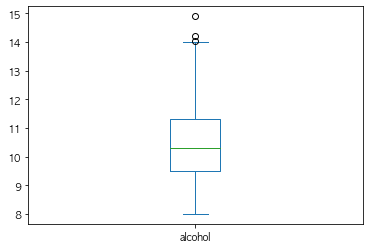

In [57]:
wine[ 'alcohol' ].plot( kind = 'box' )

In [58]:
print_outlier( wine, 'alcohol' )

이상치 기준값 : 6.8, 14.0

alcohol 변수 이상치

[14.9, 14.05, 14.2]

alcohol 변수 이상치 개수 : 3개


* alcohol 변수 이상치는 도수에 해당함으로 별다른 처리없이 분석에 사용한다.

## 3. EDA

### 기초 통계

In [59]:
wine[ [ 'quality', 'fixed acidity', 'volatile acidity', 'citric acid' ] ].describe()

,quality,fixed acidity,volatile acidity,citric acid
count,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543
std,0.870311,1.287579,0.163224,0.145104
min,3.000000,3.800000,0.080000,0.000000
25%,5.000000,6.400000,0.230000,0.250000
50%,6.000000,7.000000,0.290000,0.310000
75%,6.000000,7.700000,0.400000,0.390000
max,9.000000,15.900000,1.580000,1.660000


In [60]:
wine[ [ 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide' ] ].describe()

,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
count,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.438075,0.055808,30.417682,115.566491
std,4.756676,0.034653,17.673881,56.288223
min,0.600000,0.009000,1.000000,6.000000
25%,1.800000,0.038000,17.000000,78.000000
50%,3.000000,0.047000,29.000000,118.000000
75%,8.100000,0.064000,41.000000,155.000000
max,65.800000,0.610000,289.000000,440.000000


In [61]:
wine[ [ 'density', 'pH', 'sulphates', 'alcohol' ] ].describe()

,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000
mean,0.994673,3.219502,0.530524,10.504918
std,0.003014,0.160713,0.149396,1.194524
min,0.987110,2.740000,0.220000,8.000000
25%,0.992300,3.110000,0.430000,9.500000
50%,0.994800,3.210000,0.510000,10.300000
75%,0.996930,3.320000,0.600000,11.300000
max,1.038980,4.010000,2.000000,14.900000


### 성분별 데이터 분포

In [62]:
numerical_variable = list( set( wine.columns ) - set( [ 'type' ] ) ) 
numerical_variable = np.sort( numerical_variable )  

print( '수치형 변수 목록\n' )
for string in numerical_variable:
    print( f'{string}\t' )
print( f'\n{len( numerical_variable )}개' )

수치형 변수 목록

alcohol	
chlorides	
citric acid	
density	
fixed acidity	
free sulfur dioxide	
pH	
quality	
residual sugar	
sulphates	
total sulfur dioxide	
volatile acidity	

12개


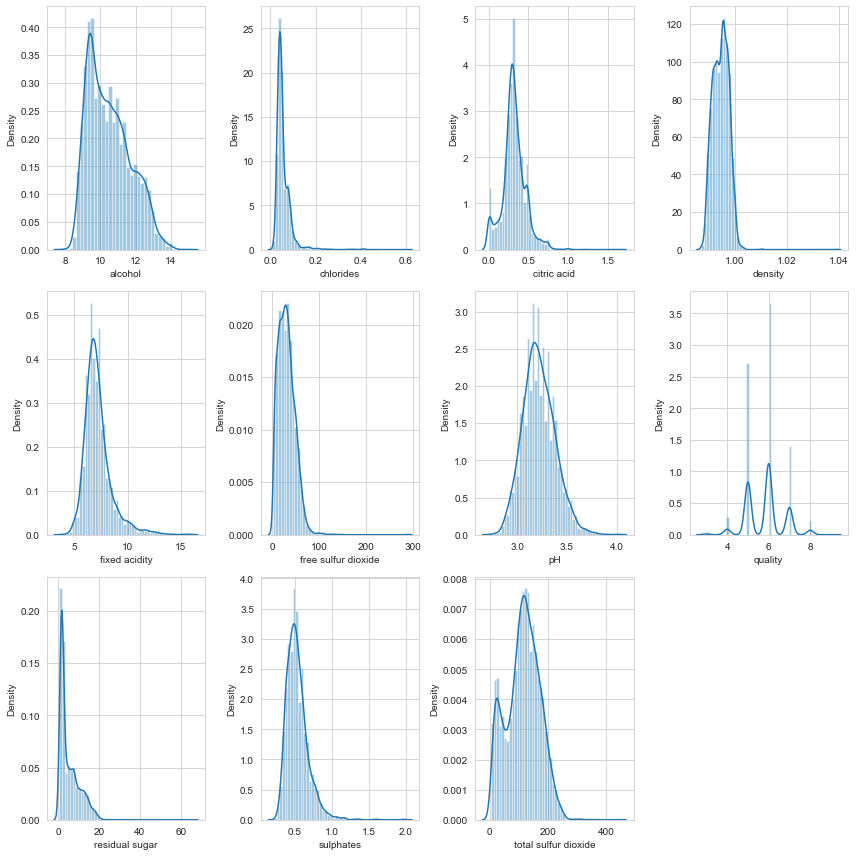

In [63]:
sns.set_style( 'whitegrid' )

#for col in numerical_variable:
#    sns.distplot( wine.loc[ wine[ col ].notnull(), col ] )
#    plt.title( col )
#    plt.show()

plt.figure( figsize = ( 12, 12 ) )
for i in range( 1, len( numerical_variable ) ):
    plt.subplot( 3, 4, i )
    sns.distplot( wine.loc[ :, numerical_variable[ i - 1 ] ] )
plt.tight_layout()
plt.show()

1. alcohol( 도수 ) 변수 데이터 분포는 도수가 낮은쪽에 좀 더 많이 데이터 분포를 이루고 있다.
2. chlorides( 염화물 ) 변수 데이터 분포는 낮은값에 치우친 정규 분포 형태의 데이터 분포를 이루고 있다. 
3. citric acid( 시트르산 ) 변수 데이터 분포는 정규 분포에 가까운 형태의 데이터 분포를 이루고 있다.
4. density( 밀도 ) 변수 데이터 분포는 중간값이 두터운 데이터 분포를 이루고 있다.
5. fixed acidity( 산도 ) 변수 데이터 분포는 정규 분포에 가까운 형태의 데이터 분포를 이루고 있다.
6. free sulfur dioxide( 독립 이산화황 ) 변수 데이터 분포는 중간값이 두터운 데이터 분포를 이루고 있다.
7. pH( 수소 이온 농도 ) 변수 데이터 분포는 정규 분포에 가까운 데이터 분포를 이루고 있다.
8. quality( 품질 ) 변수 데이터 분포는 중간 품질이 많은 데이터 분포를 이루고 있다.
9. residual sugar( 잔당, 발효 후 와인 속에 남아있는 당분 ) 변수 데이터 분포는 낮은쪽으로 데이터 분포를 이루고 있다.
10. sulphates( 황산염 ) 변수 데이터 분포는 정규 분포에 가까운 형태의 데이터 분포를 이루고 있다.
11. total sulfur dioxide( 총 이산화황 ) 변수 데이터 분포는 낮은쪽과 중간값이 많은 데이터 분포를 이루고 있다.
12. volatile acidity( 휘발성산 ) 변수 데이터 분포는 낮은쪽이 많은 데이터 분포를 이루고 있다.

### 와인 종류별 분석

In [64]:
wine[ 'type' ].value_counts()

white    4159
red      1338
Name: type, dtype: int64

In [65]:
wine_copy = wine.copy()

In [66]:
# 와인 종류 구분 정수값 변환
def judge_kind( col ):
    if col == 'red':
        return 0
    elif col == 'white':
        return 1

In [67]:
wine_copy[ 'type_number' ] = 0
wine_copy[ 'type_number' ] = wine_copy[ 'type' ].apply( judge_kind )

In [68]:
wine_copy[ 'type_number' ].value_counts()

1    4159
0    1338
Name: type_number, dtype: int64

#### 와인 종류별 품질 분류

In [69]:
wine_kind_df = wine_copy.groupby( [ 'quality','type' ] )[ 'type' ].count().unstack( 'type' )
wine_kind_df

type,red,white
quality,,
3,9.0,17.0
4,41.0,145.0
5,571.0,1217.0
6,535.0,1881.0
7,169.0,755.0
8,13.0,139.0
9,NaN,5.0


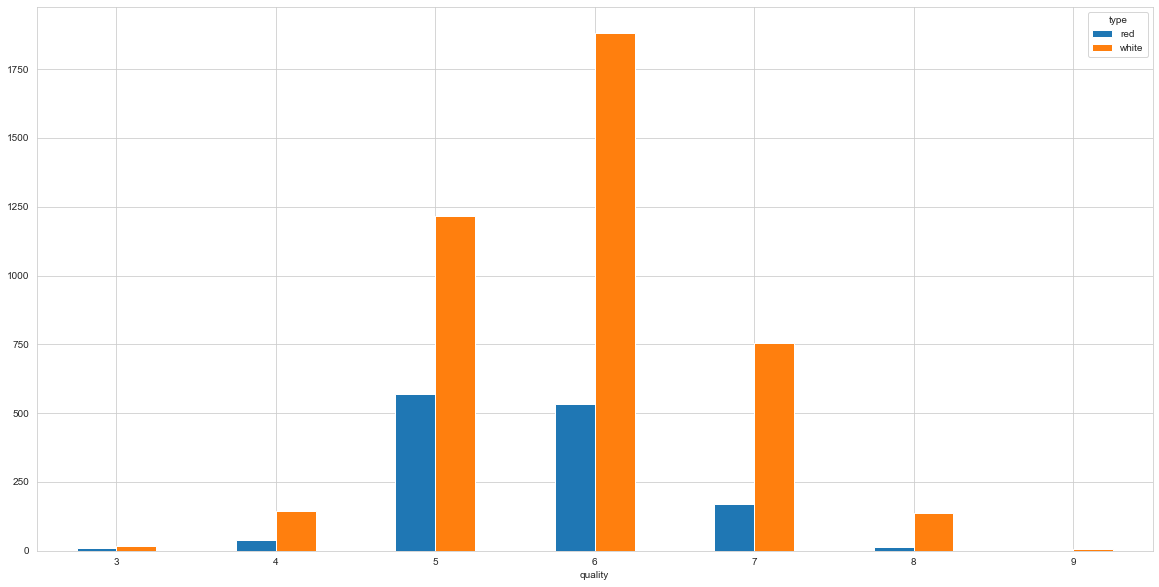

In [70]:
ax = wine_kind_df.plot( kind = 'bar', figsize = ( 20, 10 ) ) 
ax.set_xticklabels( wine_kind_df.index, rotation = 0 )
plt.show()

#### 와인 종류별 성분 비교

In [71]:
wine_kind_df = wine.groupby( [ 'type' ] )
average = wine_kind_df.mean()
average

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
type,,,,,,,,,,,,
red,5.637519,8.307922,0.525878,0.270142,2.535015,0.087504,15.826607,46.128550,0.996736,3.312930,0.658543,10.433308
white,5.877374,6.856937,0.277772,0.334114,6.372025,0.045611,35.111806,137.905506,0.994010,3.189445,0.489339,10.527956


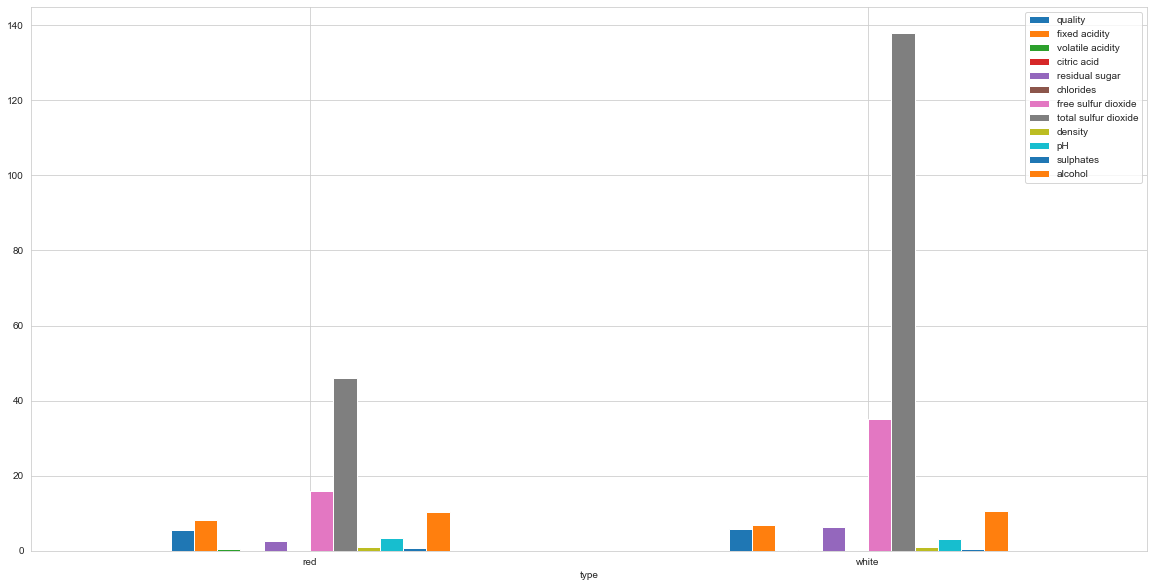

In [72]:
ax = average.plot( kind = 'bar', figsize = ( 20, 10 ) ) 
ax.set_xticklabels( average.index, rotation = 0 )
plt.show()

#### 품질 등급별 성분 분포

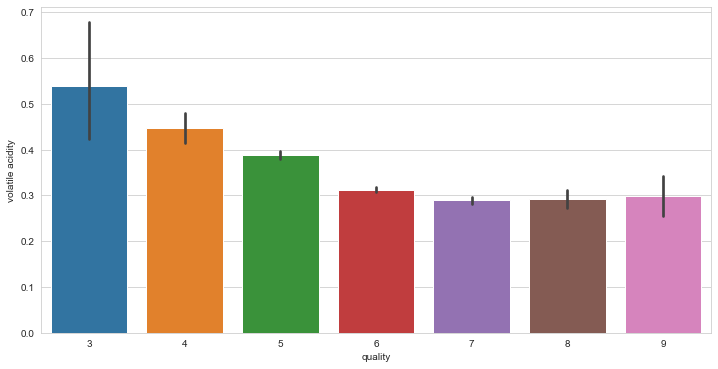

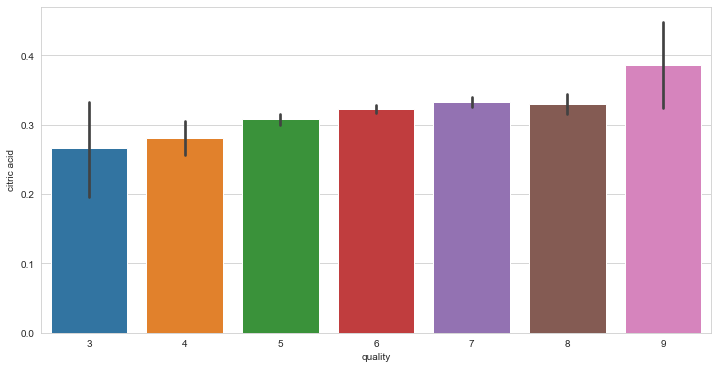

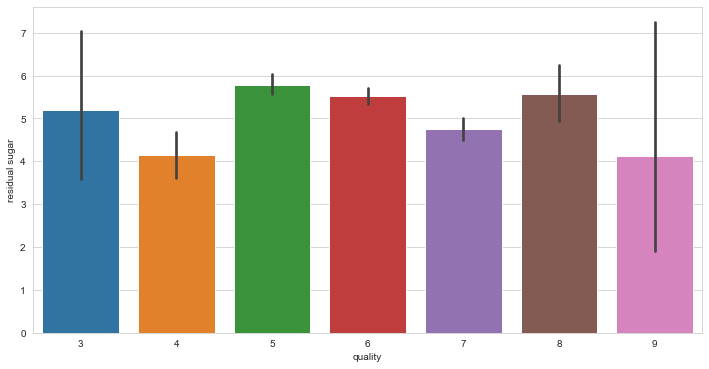

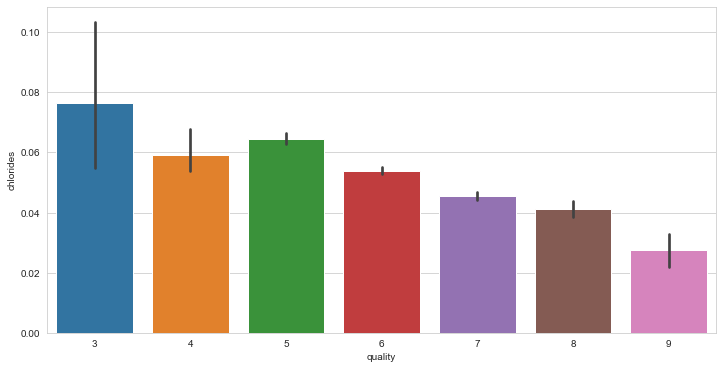

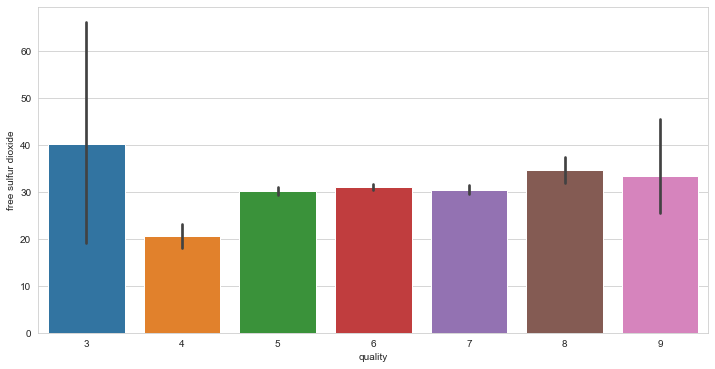

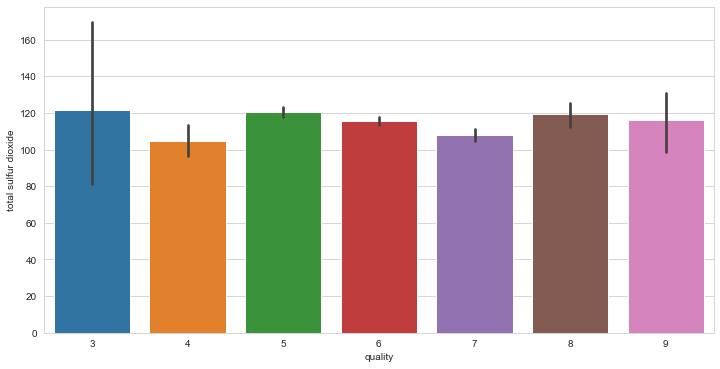

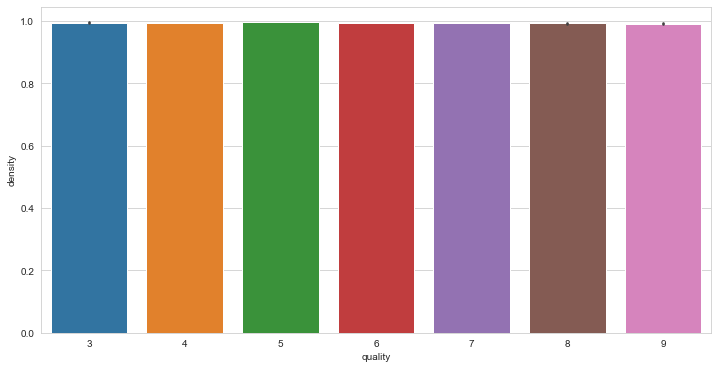

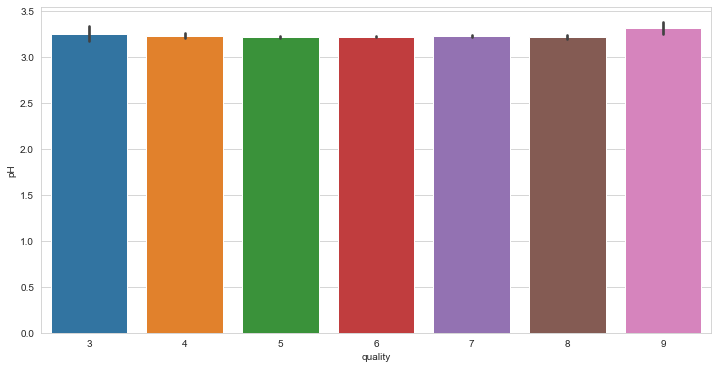

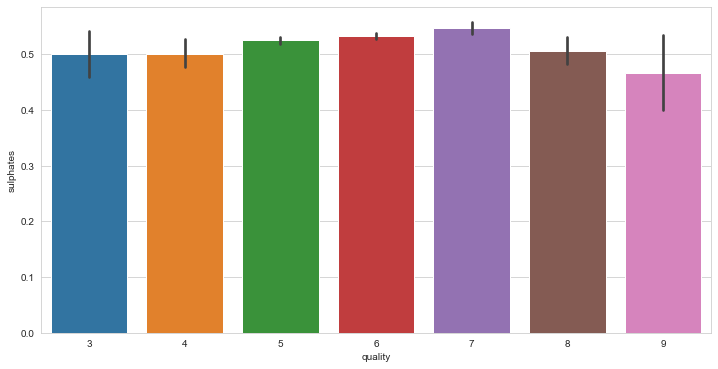

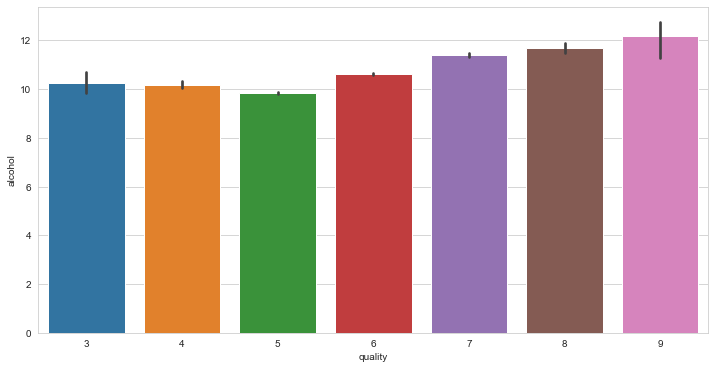

In [73]:
for i in range( 10 ):
    fig = plt.figure( figsize = ( 12, 6 ) )
    sns.barplot( x = 'quality', y = wine.columns[ i + 2 ], data = wine )

### 상관 분석

In [74]:
wine_determinant = wine.drop( [ 'quality' ], axis = 1 )
wine_corr = wine_determinant.corr() 
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.210180,0.326992,-0.112544,0.303307,-0.277079,-0.323845,0.452161,-0.250462,0.300979,-0.096274
volatile acidity,0.210180,1.000000,-0.377986,-0.192677,0.385431,-0.352572,-0.418535,0.266759,0.264130,0.225174,-0.032897
citric acid,0.326992,-0.377986,1.000000,0.135160,0.029121,0.129496,0.190955,0.088400,-0.322100,0.049013,-0.005376
residual sugar,-0.112544,-0.192677,0.135160,1.000000,-0.130339,0.396018,0.494788,0.557183,-0.259673,-0.182275,-0.361457
chlorides,0.303307,0.385431,0.029121,-0.130339,1.000000,-0.193143,-0.281654,0.364200,0.046937,0.400354,-0.259774
free sulfur dioxide,-0.277079,-0.352572,0.129496,0.396018,-0.193143,1.000000,0.716829,0.027270,-0.145586,-0.189390,-0.182321
total sulfur dioxide,-0.323845,-0.418535,0.190955,0.494788,-0.281654,0.716829,1.000000,0.039707,-0.234412,-0.272236,-0.271566
density,0.452161,0.266759,0.088400,0.557183,0.364200,0.027270,0.039707,1.000000,0.020047,0.261879,-0.688053
pH,-0.250462,0.264130,-0.322100,-0.259673,0.046937,-0.145586,-0.234412,0.020047,1.000000,0.187392,0.114959
sulphates,0.300979,0.225174,0.049013,-0.182275,0.400354,-0.189390,-0.272236,0.261879,0.187392,1.000000,-0.008713


<AxesSubplot:>

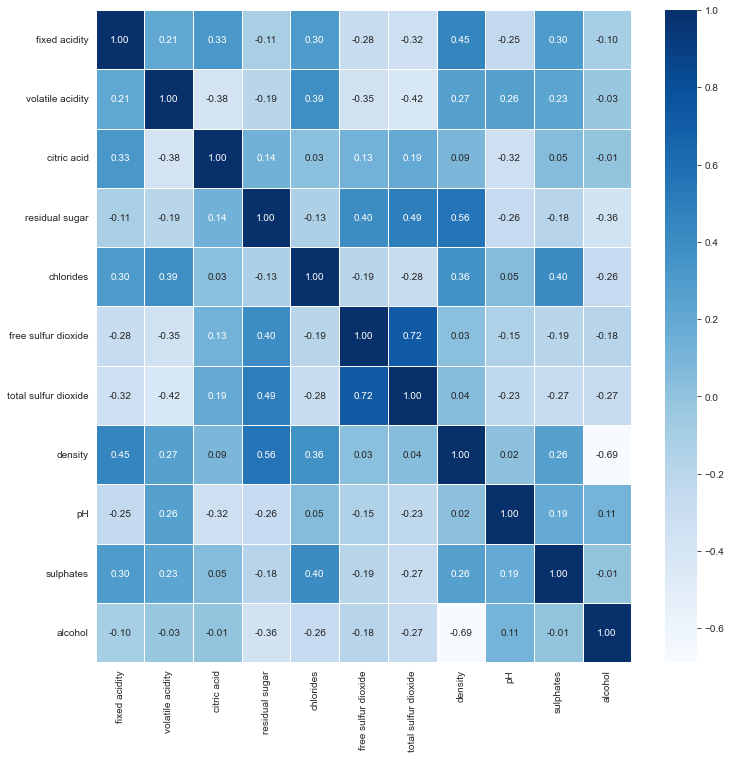

In [75]:
plt.figure( figsize = ( 12, 12 ) )
sns.heatmap( data = wine_corr, annot = True, fmt = '.2f', 
             linewidths = .5, cmap = 'Blues' )

<font color=blue>* fixed acidity( 결합산도 ) : 타르타르산(tartaric),사과산(malic)으로 이루어져 있고 와인의 산도를 제어</font>  
<font color=blue>* volatile acidity( 휘발성산 ) : 와인향에 영향</font>  
<font color=blue>* citric acid( 시트르산( 구연산 ) ) : 와인의 신선함을 올려주는 역할, 산성화에 연관</font>  
<font color=blue>* residual sugar( 잔당( 발효 후 와인 속에 남아있는 당분 ) ) : 와인의 단맛 상승시키는 성분</font>  
<font color=blue>* chlorides( 염화물 ) : 와인의 짠맛의 원인이며 와인의 신맛을 좌우하는 성분</font>  
<font color=blue>* free sulfur dioxide( 독립 이산화황 )</font>  
<font color=blue>* total sulfur dioxide( 총 이산화황 ) : 황 화합물( 독립 이산화황, 총 이산화황 )은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는 역할 (free sulfur dioxide, total sulfur, dioxide sulphates)</font>  
<font color=blue>* density( 밀도 ) : 바디의 높고 낮음을 표현하는 와인의 무게감을 의미</font>  
<font color=blue>* pH( 수소 이온 농도 ) : 와인의 신맛의 정도</font>  
<font color=blue>* sulphates( 황산염 )</font>  
<font color=blue>* alcohol( 도수 ) : 와인의 과 단맛을 주며 와인의 바디감에 영향</font>  

<AxesSubplot:xlabel='residual sugar', ylabel='density'>

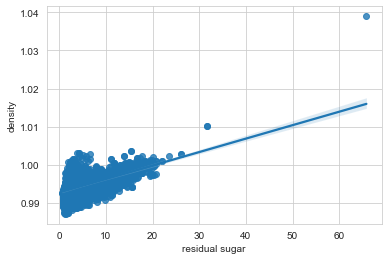

In [76]:
sns.regplot( x = 'residual sugar', y = 'density', data = wine )

* residual sugar변수와 density 변수의 상관계수는 0.56으로 높은 양의 상관관계를 가지고 있다.

<AxesSubplot:xlabel='residual sugar', ylabel='total sulfur dioxide'>

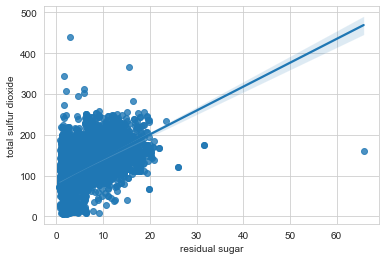

In [77]:
sns.regplot( x = 'residual sugar', y = 'total sulfur dioxide', data = wine )

<AxesSubplot:xlabel='residual sugar', ylabel='free sulfur dioxide'>

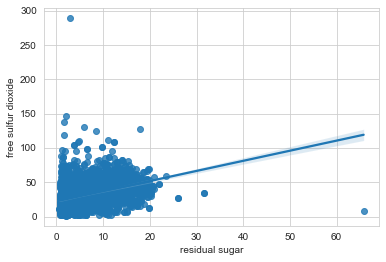

In [78]:
sns.regplot( x = 'residual sugar', y = 'free sulfur dioxide', data = wine )

* residual sugar변수와 total sulfur dioxide변수 상관계수 0.49, free sulfur dioxide변수 상관계수는 0.40으로 양의 상관관계를 가지고 있다.

<AxesSubplot:xlabel='chlorides', ylabel='sulphates'>

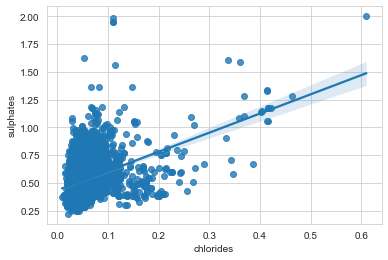

In [79]:
sns.regplot( x = 'chlorides', y = 'sulphates', data = wine )

<AxesSubplot:xlabel='chlorides', ylabel='density'>

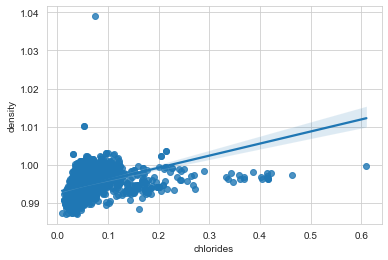

In [80]:
sns.regplot( x = 'chlorides', y = 'density', data = wine )

* chlorides 변수와 sulphates 변수 상관계수는 0.40, density변수 상관계수는 0.36으로 낮은 양의 상관관계를 가지고 있다.

<AxesSubplot:xlabel='density', ylabel='fixed acidity'>

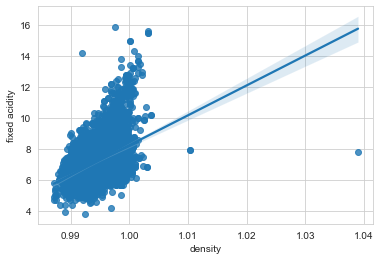

In [81]:
sns.regplot( x = 'density', y = 'fixed acidity', data = wine )

* density 변수와 fixed acidity변수 상관계수는 0.45로 양의 상관관계를 가지고 있다.

#### 전체 변수가 와인 종류별 상관관계

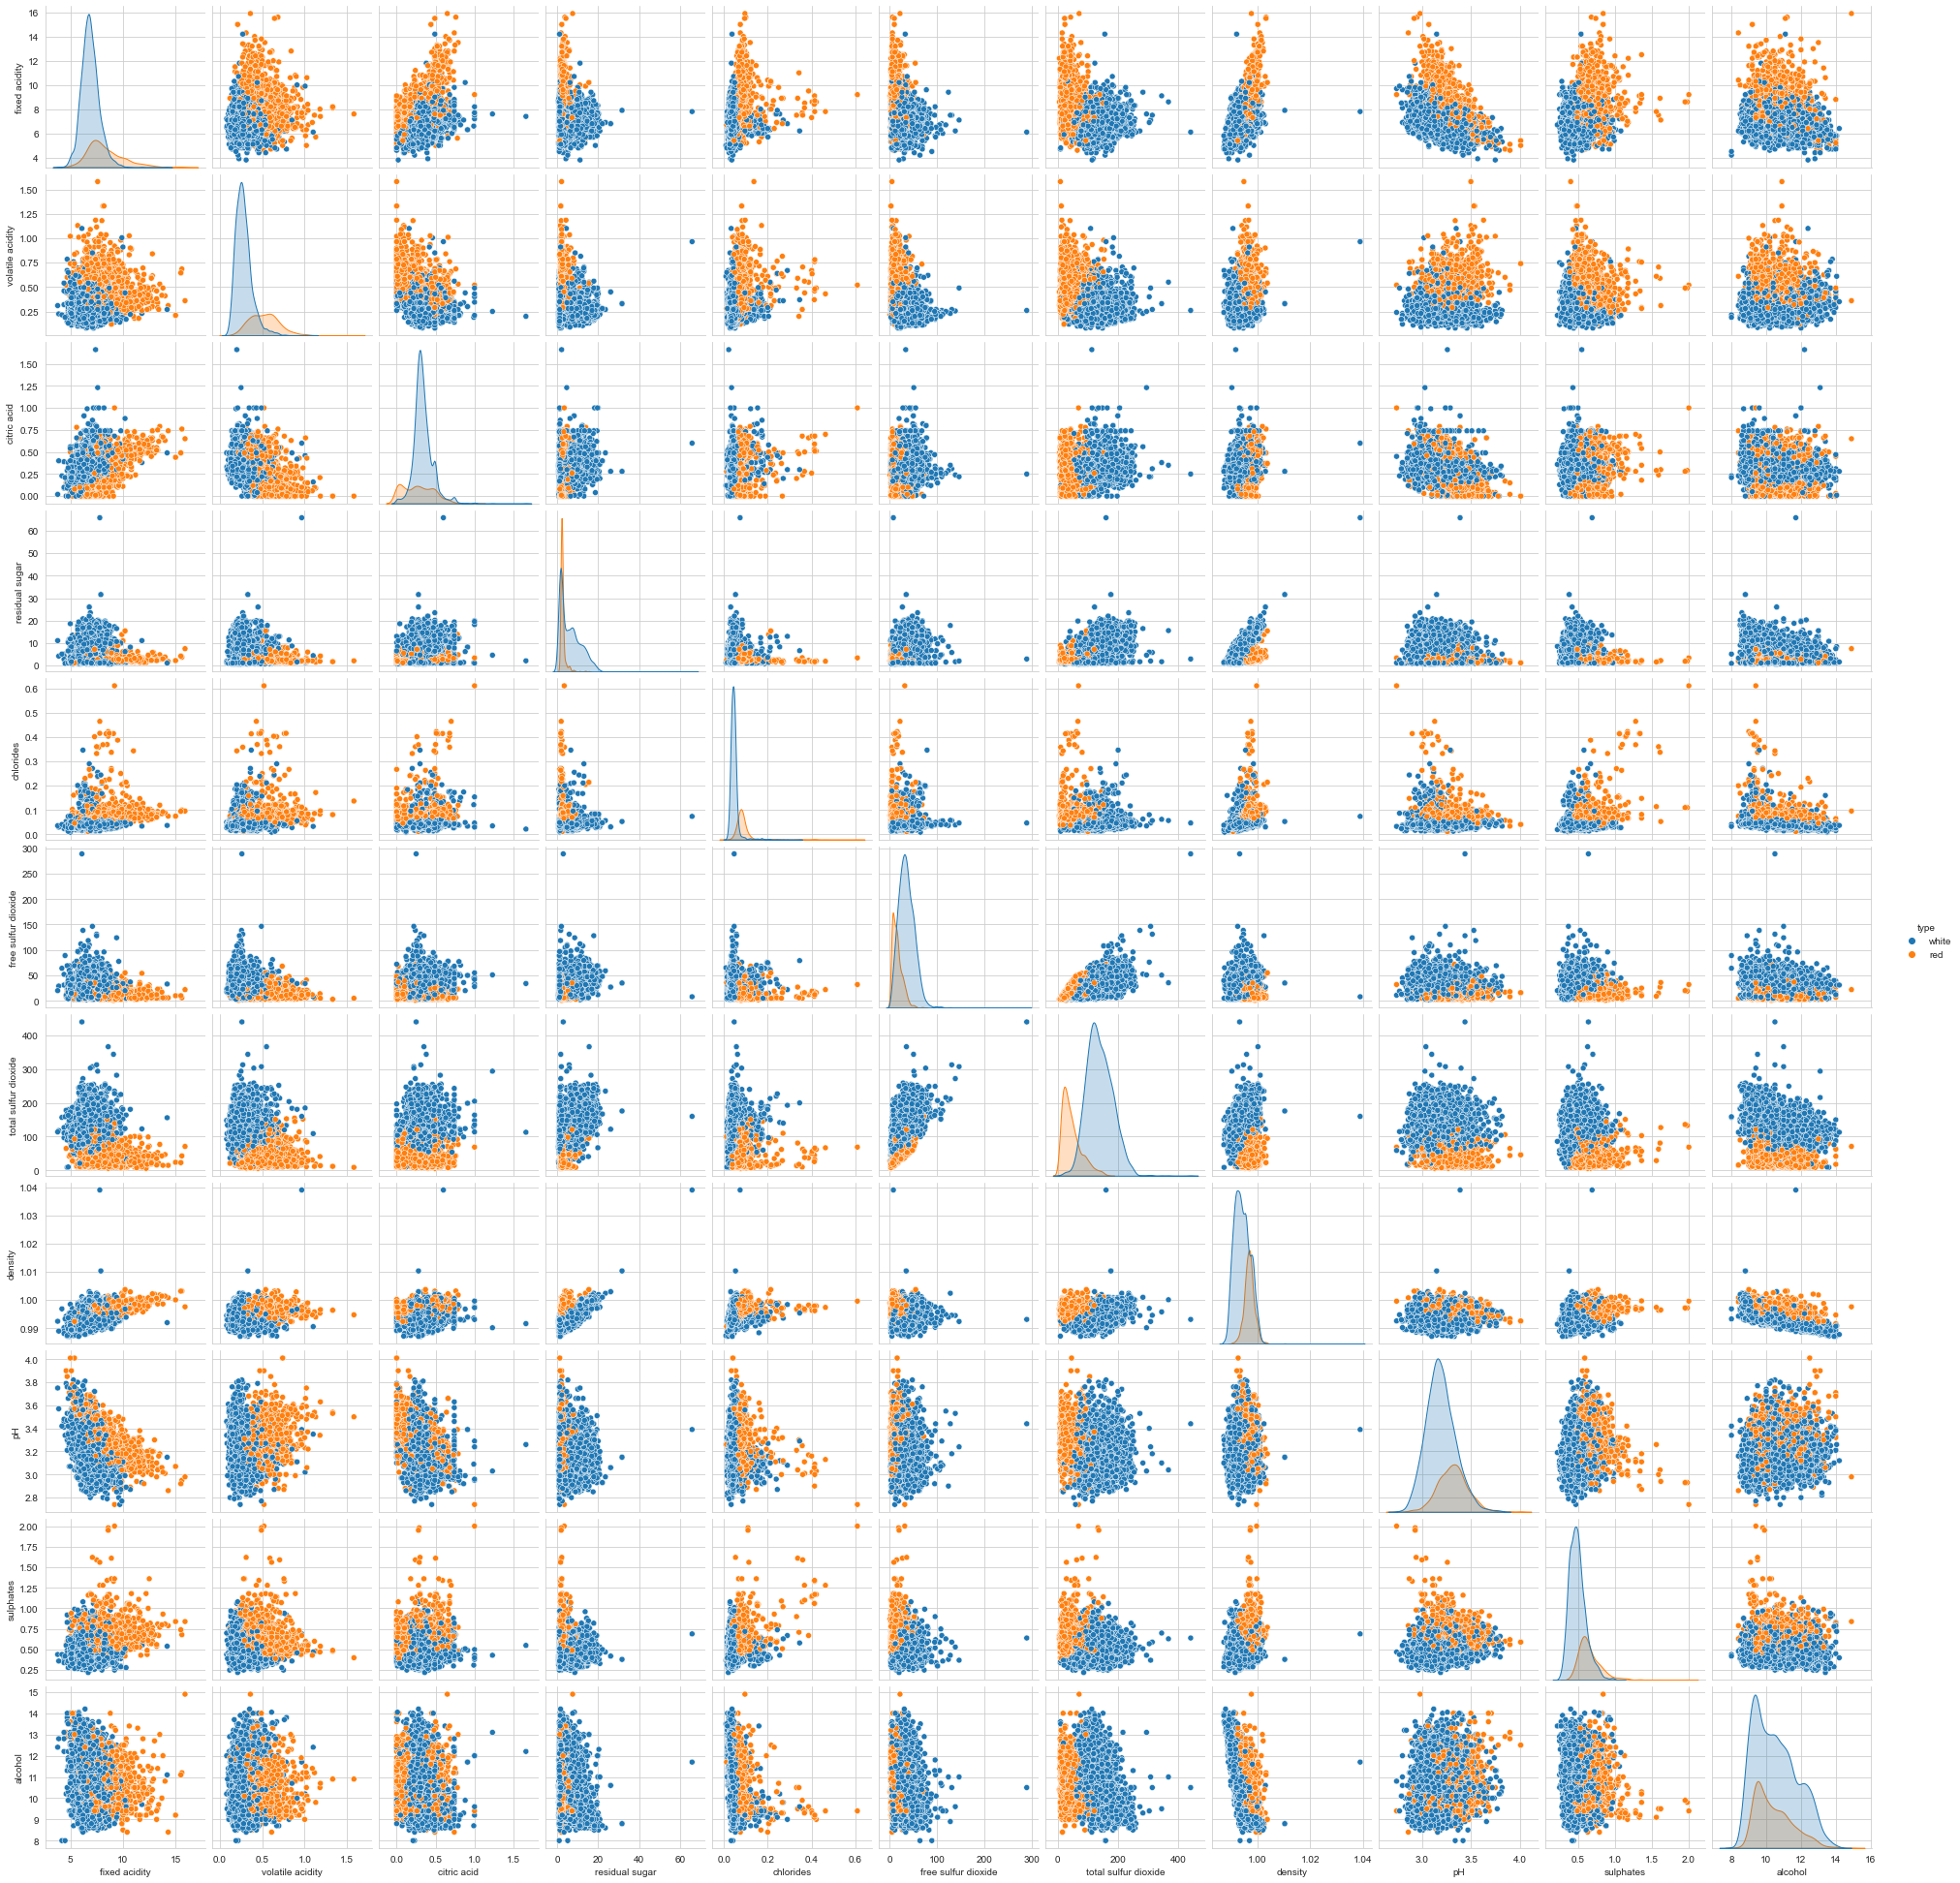

In [82]:
sns.pairplot( wine_determinant, hue = 'type' )

## 4. 와인 등급 분류 모델

### 데이터 분리

In [83]:
df = wine[:]

In [84]:
X = df.drop( [ 'quality', 'type' ], axis = 1 ).to_numpy()
y = df[ 'quality' ].to_numpy()

In [85]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (5497, 11)
y shape : (5497,)


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2, random_state = 42
)

In [88]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (4397, 11)
y_train shape : (4397,)

X_test shape : (1100, 11)
y_test shape : (1100,)


### feature scaling - Standard scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
ss = StandardScaler()
ss.fit( X_train )
X_train_scaled = ss.transform( X_train )
X_test_scaled = ss.transform( X_test )

In [91]:
print( f'X_train_scaler = {X_train_scaled[ :5,]}' )

X_train_scaler = [[ 1.53650532 -0.3565734   0.62537865 -0.94876063 -0.40882266 -0.92891252
  -1.00599223 -0.8478424  -1.62560847 -1.89350536  0.00580746]
 [-1.01722661 -0.84409943 -0.27376538 -0.94876063 -0.37973775  0.81339922
  -0.28068214 -1.48555107  1.1210246  -0.81627091  0.76005336]
 [ 0.06617482 -0.84409943  0.4870488  -0.66908755 -0.23431317 -0.36687647
  -0.51065851 -1.44803879 -1.75045542 -1.22023383  1.26288395]
 [-0.24336845 -0.05186963 -0.0662706  -0.26033458 -0.4669925  -0.53548729
  -0.40451557 -1.73449616 -0.25229194 -0.34498084  2.43615534]
 [-0.39814008  0.4356564  -0.3429303  -0.60454761 -0.67058691 -0.31067287
  -0.54603949 -1.30481011 -1.06379716 -1.28756098  1.01146865]]


In [92]:
print( f'X_test_scaler = {X_test_scaled[ :5,]}' )

X_test_scaler = [[-5.52911712e-01 -8.44099435e-01  7.20592499e-02 -8.41194059e-01
  -4.96077413e-01  3.07566781e-01 -1.03777235e-01 -1.57080624e+00
  -2.59802061e-03  7.99580761e-01  1.26288395e+00]
 [ 6.61748165e-02 -7.22217927e-01  3.48718950e-01  1.91251012e+00
   2.01960579e-01  9.82010036e-01  1.32915246e+00  1.06187340e+00
  -2.06257282e+00 -1.01825237e+00 -1.25126903e+00]
 [ 3.75718081e-01  1.47164922e+00 -2.14121835e+00 -7.76654118e-01
   9.29083487e-01 -1.04131973e+00 -1.73130232e+00  3.38909561e-01
   6.21636767e-01  1.93636383e-01  5.80746276e-03]
 [ 2.15559185e+00  2.38576053e+00  7.63708501e-01 -6.69087548e-01
   8.56209135e-02 -8.72708916e-01 -1.50132595e+00  6.52648585e-01
  -4.39562372e-01  2.60963536e-01  4.24832959e-01]
 [ 2.69729256e+00  3.74715646e-01  3.48718950e-01 -7.55140804e-01
   7.25489072e-01 -7.60301707e-01 -1.53670693e+00  7.00391480e-01
  -6.26832808e-01  7.99580761e-01  5.92443158e-01]]


### feature engineering

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dt = DecisionTreeClassifier()
dt.fit( X_train_scaled, y_train )

DecisionTreeClassifier()

In [95]:
print( 'feature 중요도 확인\n' )
columns = list( wine.columns )
print( columns[ 1: len( columns ) -1 ] )
print( f'\n{dt.feature_importances_}' )

feature 중요도 확인

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

[0.06775299 0.10122221 0.07388569 0.07732446 0.08944189 0.08315824
 0.09450829 0.09852645 0.08309457 0.08898929 0.14209592]


### 분류 모델 생성

In [96]:
from sklearn.model_selection import cross_validate, StratifiedKFold

# 교차 검증 수행 함수
def cross_validation( model, X_train, y_train, n_splits = 5 ):
    splitter = StratifiedKFold( n_splits = n_splits, shuffle = True, random_state = 42 )
    scores = cross_validate( model, X_train, y_train, cv = splitter )
    
    return scores[ 'test_score' ]

In [97]:
# 교차 검증 수행 함수 호출 및 검증 평균 출력 함수
def run_cross_validation( model, X_train, y_train,  prn_option = 1, folds = [ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ] ):    
    mean_score_list = []
    ret_value = None
    
    for i, fold in enumerate( folds ):
        scores = cross_validation( model, X_train, y_train, fold )
        mean_score_list.append( np.mean( scores ) )
        if prn_option:
            print( f'{fold:3} fold 교차 검증 평균 : {mean_score_list[ i ]:10.5f}' )

    mean_score_array = np.array( mean_score_list )
    if prn_option:
        print( f'\n가장 높은 검증 평균 : {np.max( mean_score_array ):10.5f}( {folds[ mean_score_array.argmax() ]}회 검증 폴드 )' )
    else:
        ret_value = ( max( mean_score_array ), folds[ mean_score_array.argmax() ] )
        
    return ret_value

In [98]:
from sklearn.model_selection import GridSearchCV

# 최적 하이퍼파라미터 검색 함수
def optimal_parameter( model, X_train, y_train, parameters, cv = 5, scoring = 'accuracy' ):
    optimal_model = GridSearchCV( model, param_grid = parameters, 
                        scoring = scoring, cv = cv )
    optimal_model.fit( X_train, y_train )

    print( f'GridSearchCV 최적 하이퍼파라미터 : {optimal_model.best_params_}' )
    print( f'GridSearchCV 최고 정확도 : {optimal_model.best_score_:10.5f}' )
    
    return optimal_model

#### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

* Logistic Regression 모델 생성 및 검증( 표준화되지 않는 feature 적용 )

In [100]:
lr_n = LogisticRegression()
lr_n.fit( X_train, y_train )

LogisticRegression()

In [101]:
print( '*** 표준화를 적용하지 않은 경우 Logistic Regression 분류 모델\n' )
run_cross_validation( lr_n, X_train, y_train )

*** 표준화를 적용하지 않은 경우 Logistic Regression 분류 모델

  5 fold 교차 검증 평균 :    0.47055
 10 fold 교차 검증 평균 :    0.46760
 20 fold 교차 검증 평균 :    0.46829
 30 fold 교차 검증 평균 :    0.47216
 40 fold 교차 검증 평균 :    0.46738
 50 fold 교차 검증 평균 :    0.46852
 60 fold 교차 검증 평균 :    0.47285
 70 fold 교차 검증 평균 :    0.46511
 80 fold 교차 검증 평균 :    0.46715
 90 fold 교차 검증 평균 :    0.47061
100 fold 교차 검증 평균 :    0.46805

가장 높은 검증 평균 :    0.47285( 60회 검증 폴드 )


* Logistic Regression 모델 생성 및 검증( 표준화된 feature 적용 )

In [102]:
lr_ss = LogisticRegression()
lr_ss.fit( X_train_scaled, y_train )

LogisticRegression()

In [103]:
print( '*** 표준화를 적용한 경우 Logistic Regression 분류 모델\n' )
run_cross_validation( lr_ss, X_train_scaled, y_train )

*** 표준화를 적용한 경우 Logistic Regression 분류 모델

  5 fold 교차 검증 평균 :    0.54629
 10 fold 교차 검증 평균 :    0.54311
 20 fold 교차 검증 평균 :    0.54311
 30 fold 교차 검증 평균 :    0.54358
 40 fold 교차 검증 평균 :    0.54381
 50 fold 교차 검증 평균 :    0.54540
 60 fold 교차 검증 평균 :    0.54544
 70 fold 교차 검증 평균 :    0.54429
 80 fold 교차 검증 평균 :    0.54450
 90 fold 교차 검증 평균 :    0.54614
100 fold 교차 검증 평균 :    0.54609

가장 높은 검증 평균 :    0.54629( 5회 검증 폴드 )


* Logistic Regression 모델 하이퍼파라미터 튜닝

In [104]:
print( f'Logistic Regression 기본 하이퍼파라미터 : \n{lr_ss.get_params()}' )

Logistic Regression 기본 하이퍼파라미터 : 
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [105]:
parameters = { 'C': [ 1, 5, 10, 20, 50, 100 ],
               'max_iter': [ 10, 50, 100, 150, 200 ] }

optimal_lr = optimal_parameter( lr_ss, X_train_scaled, y_train, parameters )

GridSearchCV 최적 하이퍼파라미터 : {'C': 100, 'max_iter': 150}
GridSearchCV 최고 정확도 :    0.54674


* Logistic Regression 모델 검증

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
lr_predictions = optimal_lr.predict( X_test_scaled )
lr_accuracy = accuracy_score( y_test, lr_predictions )
print( f'테스트 데이터에 대한 Logistic Regression 모델 정확도 : {lr_accuracy:10.5f}' )

테스트 데이터에 대한 Logistic Regression 모델 정확도 :    0.52273


#### Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

* Decision Tree 모델 생성 및 검증( 표준화되지 않는 feature 적용 )

In [109]:
dt_n = DecisionTreeClassifier( random_state = 42 )
dt_n.fit( X_train, y_train )

DecisionTreeClassifier(random_state=42)

In [110]:
print( '*** 표준화를 적용하지 않은 경우 Decision Tree 분류 모델\n' )
run_cross_validation( dt_n, X_train, y_train )

*** 표준화를 적용하지 않은 경우 Decision Tree 분류 모델

  5 fold 교차 검증 평균 :    0.55970
 10 fold 교차 검증 평균 :    0.57358
 20 fold 교차 검증 평균 :    0.57220
 30 fold 교차 검증 평균 :    0.57335
 40 fold 교차 검증 평균 :    0.58335
 50 fold 교차 검증 평균 :    0.58767
 60 fold 교차 검증 평균 :    0.58904
 70 fold 교차 검증 평균 :    0.57068
 80 fold 교차 검증 평균 :    0.57720
 90 fold 교차 검증 평균 :    0.58656
100 fold 교차 검증 평균 :    0.57679

가장 높은 검증 평균 :    0.58904( 60회 검증 폴드 )


* Decision Tree 모델 생성 및 검증( 표준화된 feature 적용 )

In [111]:
dt_ss = DecisionTreeClassifier( random_state = 42 )
dt_ss.fit( X_train_scaled, y_train )

DecisionTreeClassifier(random_state=42)

In [112]:
print( '*** 표준화를 적용한 경우 Logistic Regression 분류 모델\n' )
run_cross_validation( dt_ss, X_train_scaled, y_train )

*** 표준화를 적용한 경우 Logistic Regression 분류 모델

  5 fold 교차 검증 평균 :    0.56016
 10 fold 교차 검증 평균 :    0.57335
 20 fold 교차 검증 평균 :    0.57243
 30 fold 교차 검증 평균 :    0.57449
 40 fold 교차 검증 평균 :    0.58358
 50 fold 교차 검증 평균 :    0.58994
 60 fold 교차 검증 평균 :    0.59087
 70 fold 교차 검증 평균 :    0.56999
 80 fold 교차 검증 평균 :    0.57698
 90 fold 교차 검증 평균 :    0.58701
100 fold 교차 검증 평균 :    0.57678

가장 높은 검증 평균 :    0.59087( 60회 검증 폴드 )


* Decision Tree 모델 하이퍼파라미터 튜닝

In [113]:
print( f'Decision Tree 기본 하이퍼파라미터 : \n{dt_ss.get_params()}' )

Decision Tree 기본 하이퍼파라미터 : 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [114]:
parameters = { 'max_depth': [ 2, 3, 5, 10 ],
               'min_samples_split': [ 2, 3, 5 ],
               'min_samples_leaf': [ 1, 5, 8 ] }

optimal_dt = optimal_parameter( dt_ss, X_train_scaled, y_train, parameters )

GridSearchCV 최적 하이퍼파라미터 : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :    0.55061


* Decision Tree 모델 검증

In [115]:
dt_predictions = optimal_dt.predict( X_test_scaled )
dt_accuracy = accuracy_score( y_test, dt_predictions )
print( f'테스트 데이터에 대한 Decision Tree 모델 정확도 : {dt_accuracy:10.5f}' )

테스트 데이터에 대한 Decision Tree 모델 정확도 :    0.57636


#### 딥러닝 - MLP( Multiple Layer Perceptron )

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

* MLP 모델 생성 함수

In [117]:
from tensorflow.keras import regularizers

In [118]:
def build_model():
    model = keras.Sequential()
    model.add( layers.Flatten( input_shape = [ X_train_scaled.shape[ 1 ] ] ) )
    
    # 은닉층에 L1, L2 규제를 적용한다.
    model.add( layers.Dense( 64, activation = 'relu', 
                                 kernel_regularizer = regularizers.l1_l2( l1 = 0.001, l2 = 0.001 ) ) )
    model.add( layers.Dense( 64, activation = 'relu', 
                                 kernel_regularizer = regularizers.l1_l2( l1 = 0.001, l2 = 0.001 ) ) )
    
    model.add( layers.Dense( 10, activation = 'softmax' ) )
    
    optimizer = tf.keras.optimizers.RMSprop( 0.0001 ) 
    model.compile( loss = 'sparse_categorical_crossentropy', 
                   optimizer = optimizer, 
                   metrics = [ 'accuracy' ] )
    
    return model

* MLP 학습시 과정 표시 클래스

In [119]:
class PrintDot( keras.callbacks.Callback ):
    def on_epoch_end( self, epoch, logs ):
        if epoch % 100 == 0:
            print( '' )
        print( '.', end = '' )

* MLP 학습 시각화

In [120]:
def plot_metric_accuracy( history ):
    hist_df = pd.DataFrame( history.history )
    hist_df[ 'epoch' ] = history.epoch
    
    plt.figure( figsize = ( 8, 12 ) )
    plt.subplot( 2, 1, 1 )
    plt.xlabel( 'Epoch' )
    plt.ylabel( 'Accuracy [ Survived ]' )
    plt.plot( hist_df[ 'epoch' ], hist_df[ 'accuracy' ], label = 'Train Error' )
    plt.plot( hist_df[ 'epoch' ], hist_df[ 'val_accuracy' ], label = 'Val Error' )
    plt.ylim( [ 0, 1 ] )
    plt.legend()

    plt.show()

* MLP 모델 생성 및 구조 확인

In [121]:
model = build_model()

2021-11-25 14:24:03.660151: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-25 14:24:03.661772: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [122]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 11)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 5,578
Trainable params: 5,578
Non-trainable params: 0
_________________________________________________________________


* MLP 모델 학습

In [123]:
history = model.fit( X_train_scaled, y_train, epochs = 500,
                     validation_split = 0.2, verbose = 0,
                     callbacks = [ PrintDot() ] )


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

* MLP 학습 과정 시각화

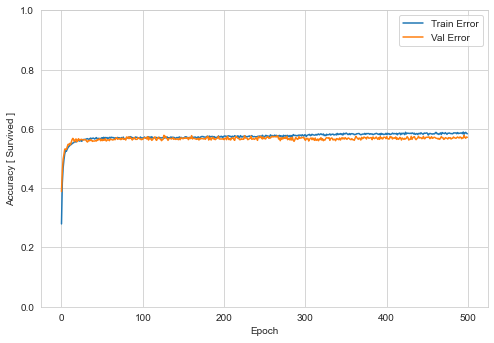

In [124]:
plot_metric_accuracy( history )

* MLP 생성 모델 평가

In [125]:
loss, accuracy = model.evaluate( X_test_scaled, y_test, verbose = 2 )

print( f'테스트 데이터 정확도 : {accuracy:10.5f}' )

1100/1 - 0s - loss: 1.0695 - accuracy: 0.5464
테스트 데이터 정확도 :    0.54636


* MLP 생성 모델로 테스트 데이터 예측

In [130]:
mlp_predictions = model.predict( X_test_scaled )

In [131]:
mlp_predictions[ 0 ]

array([1.3947959e-08, 1.4794071e-08, 1.3367419e-08, 3.8204403e-04,
       1.3808905e-03, 1.9876156e-02, 4.1298270e-01, 4.9202996e-01,
       7.3013149e-02, 3.3516457e-04], dtype=float32)

In [132]:
sum( mlp_predictions[ 0 ] )

1.0000001135884569

In [133]:
max( mlp_predictions[ 0 ] )

0.49202996

In [135]:
np.array( mlp_predictions[ 0 ] ).argmax()

7

In [136]:
mlp_predictions = [ np.array( values ).argmax() for values in mlp_predictions ]

#### 와인 품질 등급 분류 모델 테스트 데이터 예측값

In [137]:
result_df = pd.DataFrame( { '정답': y_test, 
                            'LR 예측값': lr_predictions, 
                            'DT 예측값': dt_predictions,
                            'MLP 예측값' : mlp_predictions } )
result_list = result_df[ [ '정답', 'LR 예측값', 'DT 예측값', 'MLP 예측값' ] ].to_numpy()

In [138]:
all_count = 0
lr_count = 0
dt_count = 0
mlp_count = 0

print( '\t정답\tLR 모델\tDT 모델\tMLP 모델' )
for i, value in enumerate( result_list ):
    print( f'{i + 1:5} - {value[ 0 ]:2}\t{value[ 1 ]:2}\t{value[ 2 ]:2}\t{value[ 3 ]}', end = '' )
    if ( value[ 0 ] == value[ 1 ] ) and ( value[ 0 ] == value[ 2 ] ) and ( value[ 0 ] == value[ 3 ] ):
        print( '\t일치', end = '' )
    elif ( value[ 0 ] == value[ 1 ] ) and ( value[ 0 ] != value[ 2 ] ) and ( value[ 0 ] != value[ 3 ] ):
        lr_count += 1
        print( '\tO', end = '' )
    elif ( value[ 0 ] == value[ 2 ] ) and ( value[ 0 ] != value[ 1 ] ) and ( value[ 0 ] != value[ 3 ] ):
        dt_count += 1
        print( '\tOO', end = '' )
    elif ( value[ 0 ] == value[ 3 ] ) and ( value[ 0 ] != value[ 1 ] ) and ( value[ 0 ] != value[ 2 ] ):
        mlp_count += 1
        print( '\tOOO', end = '' )
    else:
        all_count += 1
        print( '\tXXXX', end = '' )
    print()

print( f'\nLogistic Regression/Decision Tree 모델 모두 정답 일치 개수 : {all_count}개 ( {all_count / y_test.shape[ 0 ] * 100:10.5f}% )' )
print( f'Logistic Regression 모델만 정답 일치 개수 : {lr_count}개 ( {lr_count / y_test.shape[ 0 ] * 100:10.5}% )' )
print( f'Decision Tree 모델만 정답 일치 개수 : {dt_count}개 ( {dt_count / y_test.shape[ 0 ] * 100:10.5}% )' )
print( f'MLP 모델만 정답 일치 개수 : {mlp_count}개 ( {mlp_count / y_test.shape[ 0 ] * 100:10.5}% )' )

	정답	LR 모델	DT 모델	MLP 모델
    1 -  6	 7	 6	7	OO
    2 -  6	 5	 6	6	XXXX
    3 -  7	 6	 7	6	OO
    4 -  5	 5	 6	5	XXXX
    5 -  6	 6	 5	6	XXXX
    6 -  5	 5	 5	5	일치
    7 -  5	 6	 5	6	OO
    8 -  6	 7	 6	7	OO
    9 -  6	 6	 6	6	일치
   10 -  5	 5	 6	6	O
   11 -  7	 6	 7	6	OO
   12 -  5	 5	 5	5	일치
   13 -  6	 6	 6	6	일치
   14 -  6	 6	 4	5	O
   15 -  6	 5	 6	5	OO
   16 -  7	 6	 6	7	OOO
   17 -  5	 6	 5	5	XXXX
   18 -  5	 5	 5	5	일치
   19 -  6	 6	 6	6	일치
   20 -  6	 6	 6	7	XXXX
   21 -  6	 6	 7	6	XXXX
   22 -  5	 5	 5	5	일치
   23 -  7	 6	 6	7	OOO
   24 -  5	 6	 5	6	OO
   25 -  5	 5	 5	5	일치
   26 -  5	 5	 5	5	일치
   27 -  6	 6	 6	6	일치
   28 -  6	 5	 5	5	XXXX
   29 -  6	 5	 5	5	XXXX
   30 -  6	 6	 6	6	일치
   31 -  7	 5	 5	6	XXXX
   32 -  6	 6	 6	7	XXXX
   33 -  7	 6	 6	7	OOO
   34 -  5	 6	 6	6	XXXX
   35 -  6	 6	 6	6	일치
   36 -  5	 6	 6	6	XXXX
   37 -  8	 7	 7	7	XXXX
   38 -  6	 6	 6	6	일치
   39 -  6	 7	 6	7	OO
   40 -  6	 6	 6	6	일치
   41 -  6	 6	 7	6	XXXX
   42 -  6	 6	 6	6	일치
   43 -  8	 5	 8	6	OO
  